# **IMPORTS | DATA | USAGE**
***

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
tr = pd.read_csv ("../data/tr_data_22_24.csv")

# **`Question 1`** **Data Expectation**
Revisit the "data need" you included for your Assignment 1 (Question 3). Does this data match your expectations? What challenges do you expect to face with this dataset? What mitigation strategies would you employ to deal with those challenges? Please elaborate on your response.

## `My response`
I got this question wrong in the first assignment, I wanted to understand the processes the contractual obligations the transportation companies had. I understand there is a delay in invoicing, but what if what the company the delay is within the acceptable time-period of the contractual obligation. Procurement works with legal to create the contractual obligations and the KPI's businesses will use to measure if a vendor will still be used. Nonetheless, I got the question wrong. 

When I look at the data file, I see the "delay" in invoicing but I would like see three cloumns added: delivery_date, origin, shipping_provider. 
It may be that orders are invoiced once they are delivered or a week later in case the items are damaged, providing an opportunity for a resolution. What the company views as a delay may not be intentional, I do not believe data is the answer here. I believe the dataset is missing crucial information, it will suffice for the assignment but I cannot reach conclusions, there may be external factors not being considered with the dataset. I go back to the three columns I beleive are necessary and we need to know the contractual obligations. The question is stating that data is being received delayed but we truely do not know.

# **`Question 2`** **Basic Exploration**
**PART A** Write a Python code to find the number of non-null values in each column. Write a brief discussion on your findings regarding the non-null values.

**PART B** Write a Python code to find the average, minimum, and maximum invoice amounts.

## `My response`
**PART A** is telling me the amout of non-null values, **PART C** tells me how many null values there are. The good thing is that I know all invoice amounts but I do not have complete data for sites, mode, and division. I am thinking that I will drop site values, I can show sites where their data is not being properly recorded.

In [3]:
# PART A
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208799 entries, 0 to 208798
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site                 200549 non-null  object 
 1   mode                 208157 non-null  object 
 2   division             185843 non-null  object 
 3   region               208799 non-null  object 
 4   destination          208799 non-null  object 
 5   shipping_date        208799 non-null  object 
 6   invoice_date         208799 non-null  object 
 7   usda_invoice_amount  208799 non-null  float64
dtypes: float64(1), object(7)
memory usage: 12.7+ MB


In [4]:
# PART B
tr.describe()

usda_invoice_amount
count        208799.000000
mean          12779.144711
std           20643.474634
min               0.007612
25%            1432.595629
50%            3669.154932
75%           10689.671877
max          192806.675931

In [5]:
# PART C
# count null values in each column
null_counts = tr.isnull().sum()
null_counts

site                    8250
mode                     642
division               22956
region                     0
destination                0
shipping_date              0
invoice_date               0
usda_invoice_amount        0
dtype: int64

# **`Question 3`** **Basic Visuals**
Let's explore the data using some visualizations. Write Python code to create ggplots, answering the following questions.

**PART A** Which manufacturing site has placed the largest number of transportation tasks?

**PART B** Does the answer to the above question change when the visualization is broken down by region?

**PART C** Which transportation mode has been utilized the most?

In [6]:
tr.columns

Index(['site', 'mode', 'division', 'region', 'destination', 'shipping_date',
       'invoice_date', 'usda_invoice_amount'],
      dtype='object')

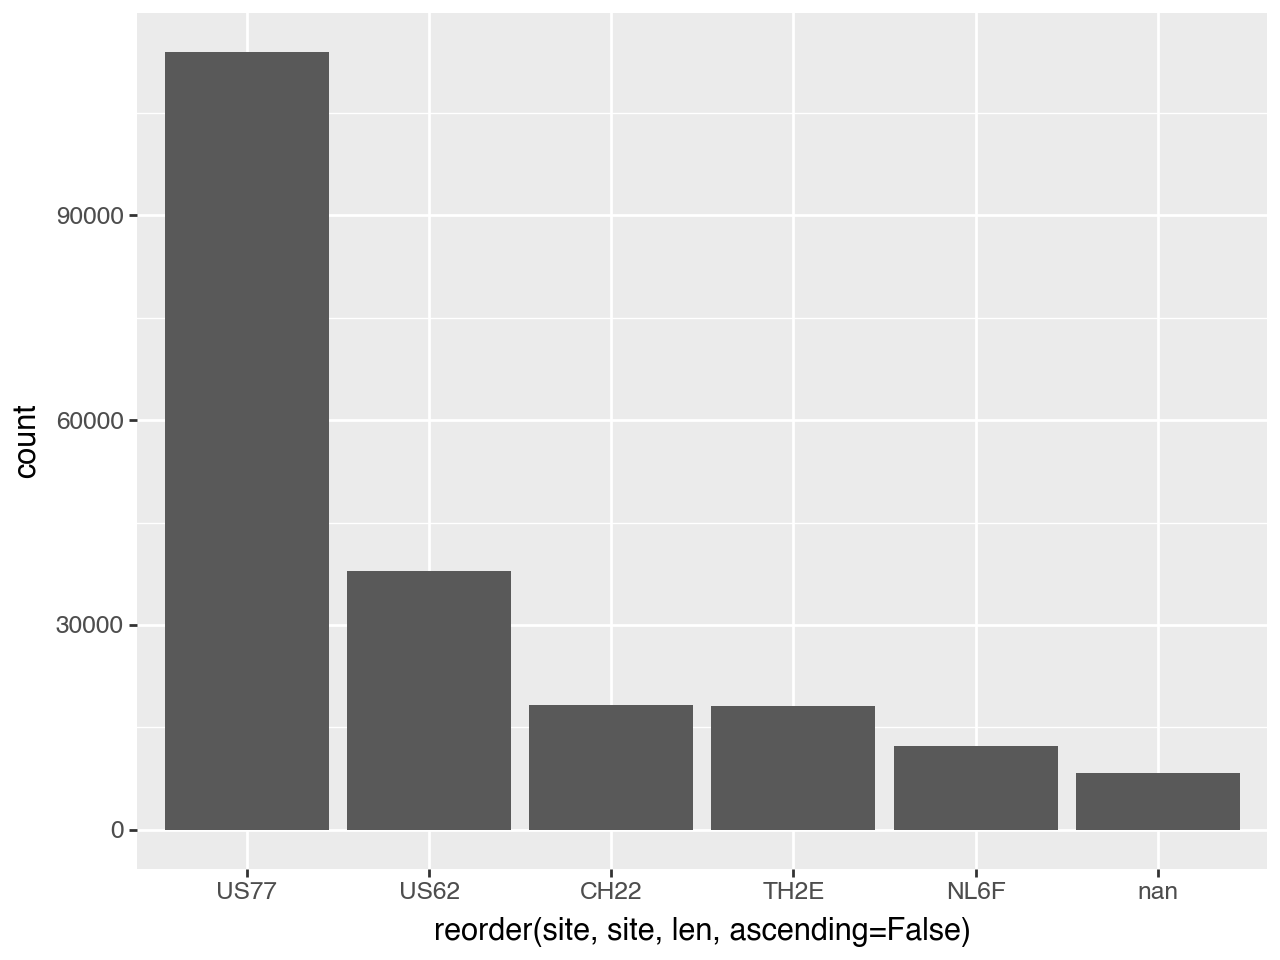

In [7]:
# PART A
ggplot(tr, aes("reorder(site, site, len, ascending=False)")) + geom_bar()

# US77

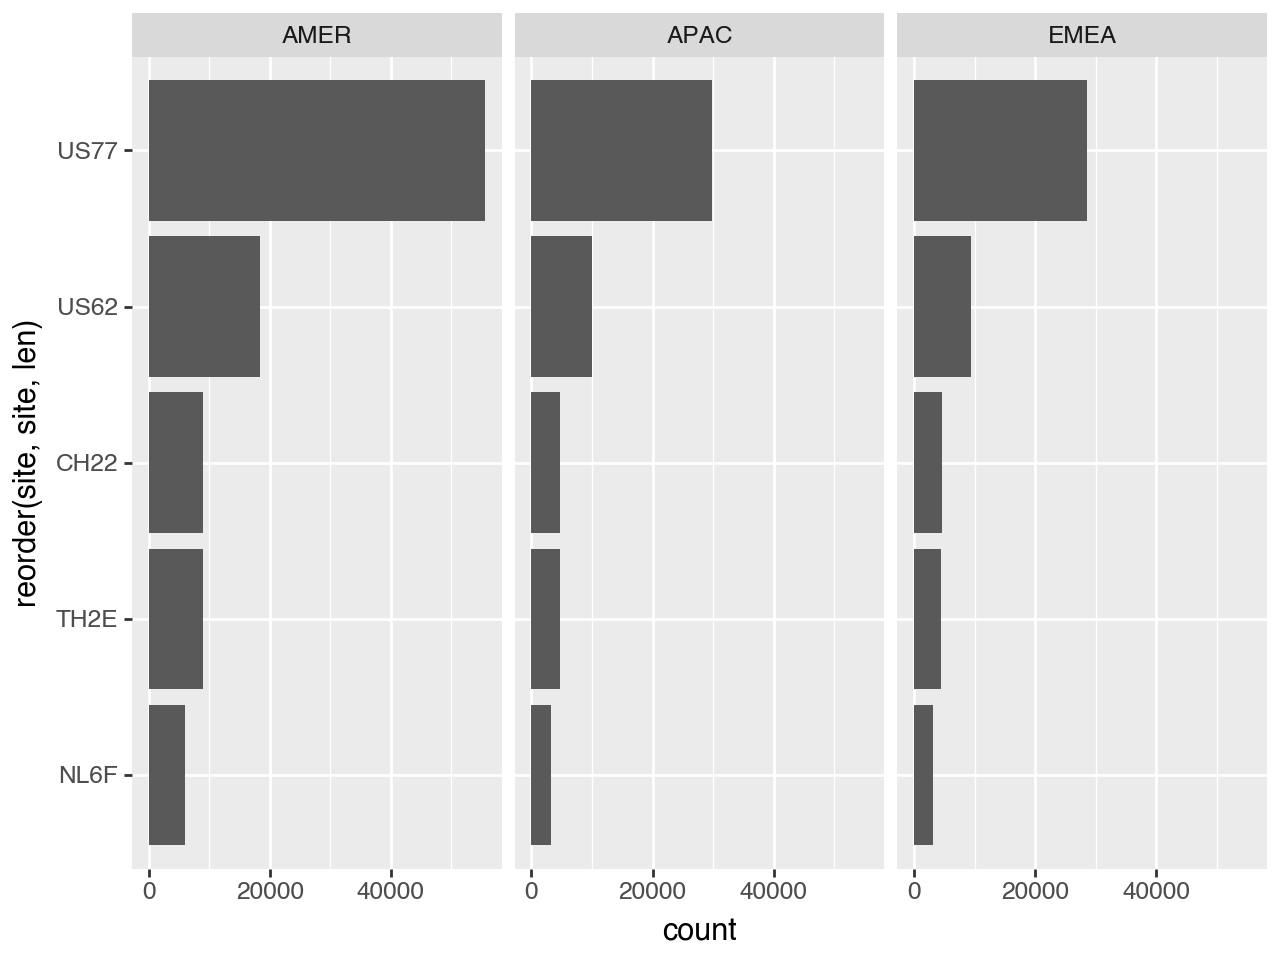

In [8]:
# PART B
ggplot(tr.dropna(subset=["site"]), aes("reorder(site, site, len)")) + geom_bar() + facet_wrap("region") + coord_flip()

# No, US77 is still the site placing the highest number of orders

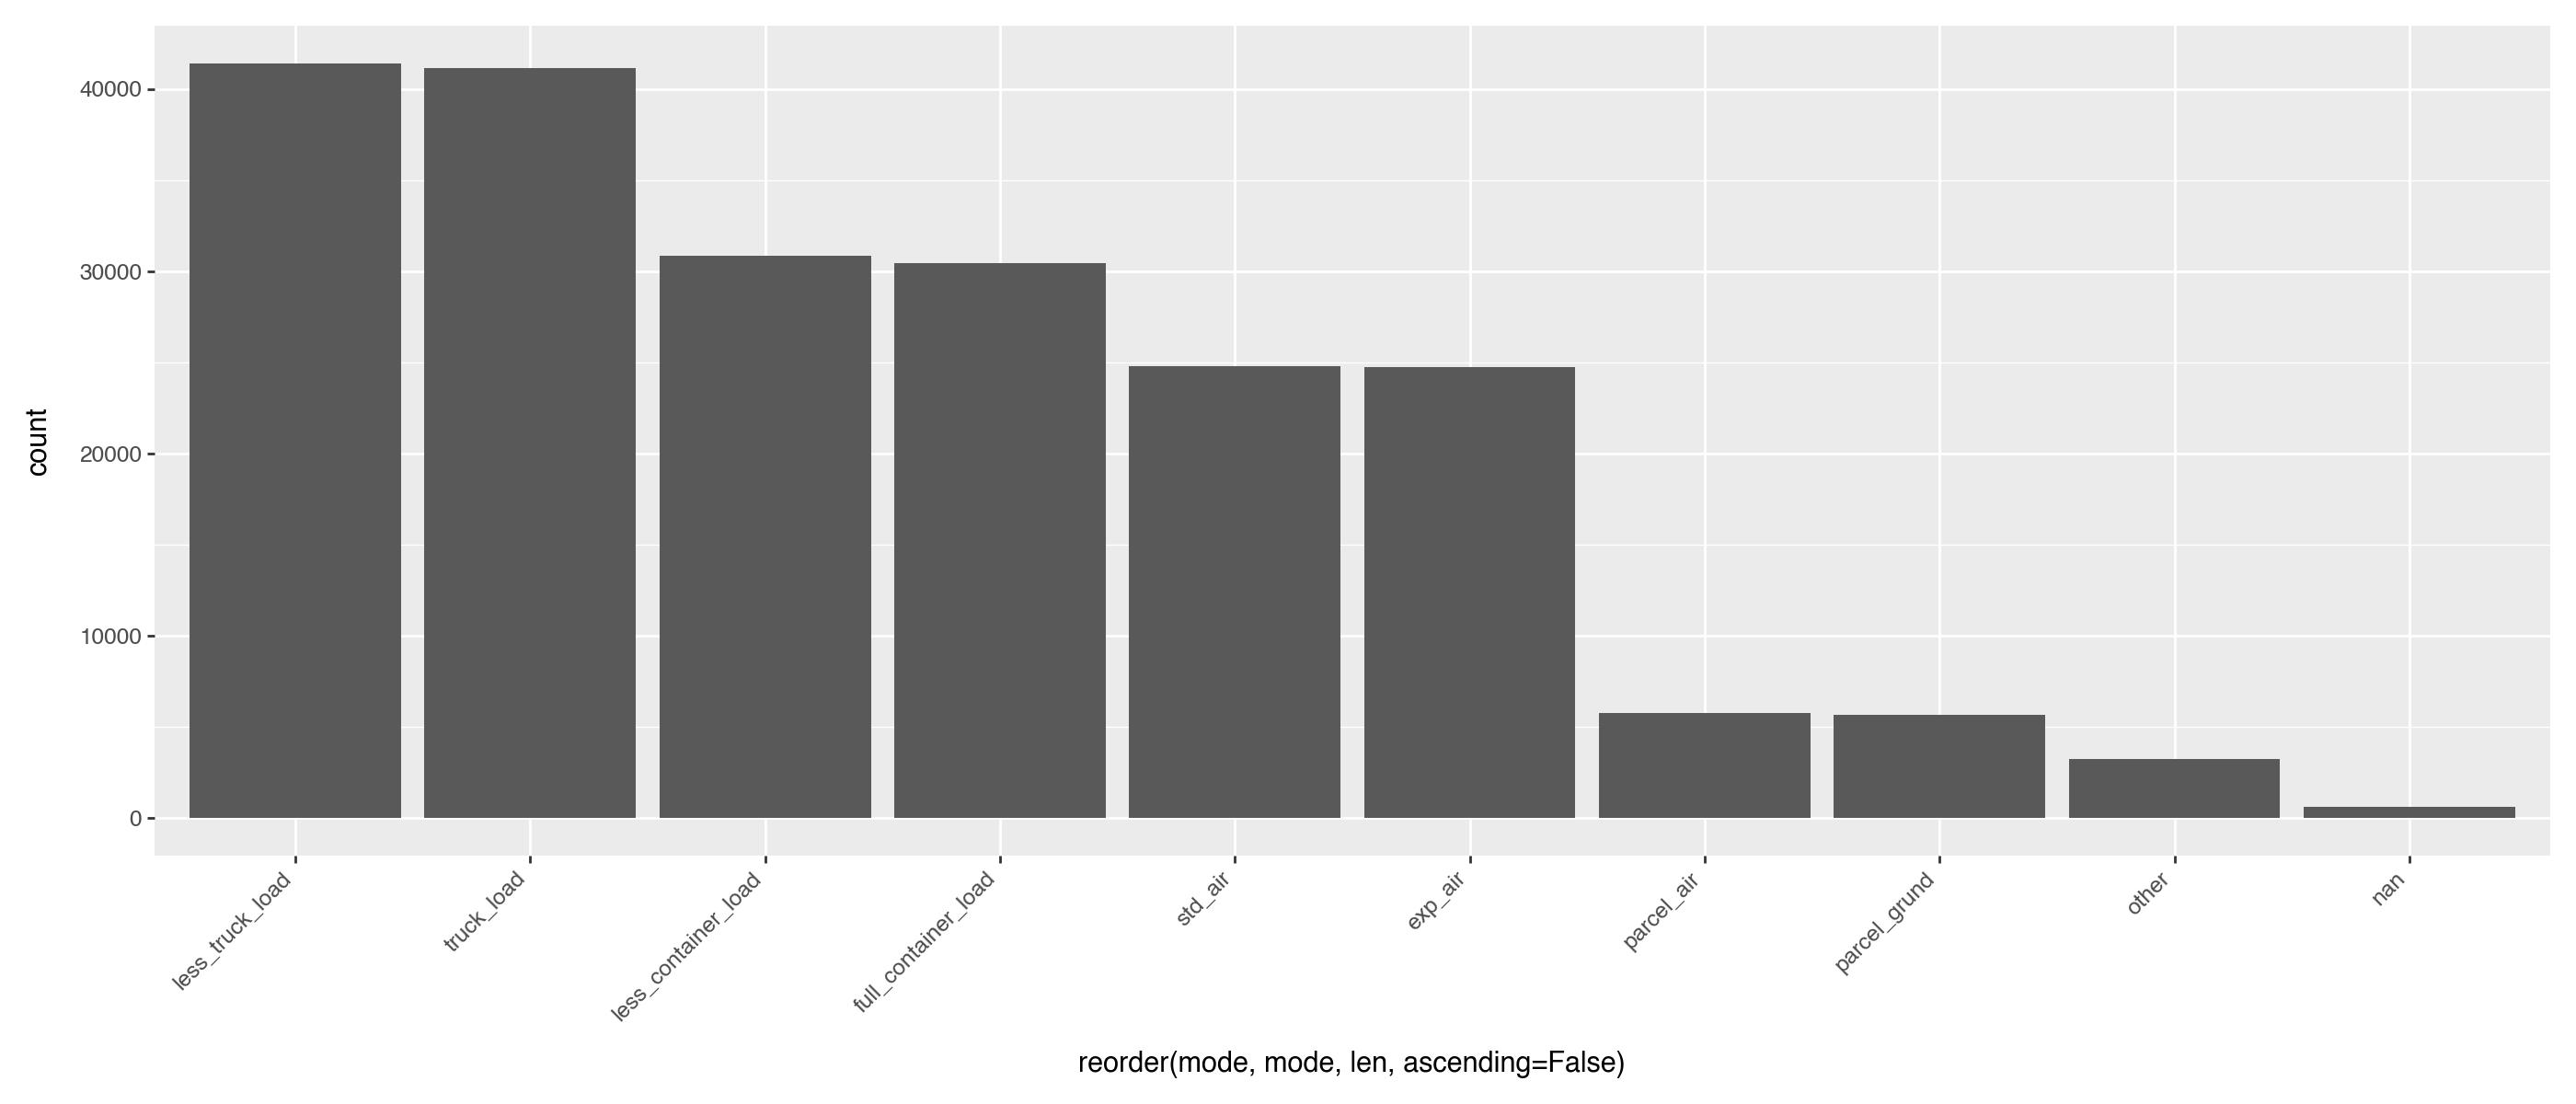

In [9]:
# PART C
ggplot(tr, aes("reorder(mode, mode, len, ascending=False)")) + geom_bar() + \
    theme(figure_size=(14, 6), axis_text_x=element_text(rotation=45, ha='right'))

# it looks like less_truck_load and truck_load are the most common modes of delivery

# **`Question 4`** **Delay Feature**
Recall from the problem description of the first assignment that there is often a significant delay (weeks to months) in when the company gets invoiced for particular shipments.We, however, do not have a delay variable in this dataset, but we can create one from the information provided.

Essentially, we need to subtract the invoice date from the shipping date to find the delay, but we have a slight issue with default formats. Currently, the two date features "shipping_date"  and "invoice_date" are loaded as objects. These two features should be converted to date and time first, before we can subtract them from each other to get a delay column.

Here is a pseudo-code for the transformation needed to properly define a "delay" feature:
- <your_dataset_name>["shipping_date"] = pd.to_datetime(<your_dataset_name>["shipping_date"])
- <your_dataset_name>["invoice_date"] = pd.to_datetime(<your_dataset_name>["invoice_date"])
- <your_dataset_name>["delay"] = <your_dataset_name>["invoice_date"] - <your_dataset_name>["shipping_date"]

When you execute the above code (after replacing your data set name with <your_dataset_name> and ensuring you have loaded the pandas package), your dataset should have a new feature called "delay." Let's explore this new feature further. Write Python code to create ggplots, answering the following questions.

**PART A** Use both histograms and density plots to find out how the delay is distributed across different regions. How about different sites? Provide a written explanation for each visualization you create.

**PART B** Is there a relationship between the delay feature and invoice amount? Does this relationship hold across different regions? How about different manufacturing sites? Provide a written explanation for each visualization you create.

**Once again, when preparing your plots, refine them as much as possible by using appropriate x-axis and y-axis titles, labels, and informative chart titles.**

## My response **`PART A`**


**Part A_1** is showing the invoice delays by region.

**Part A_2** is the same as A_1 but colored by site.

**Part A_3** is similar to A_1 but with a density geom to help visualize by site. US77 still shows as placing the greatest amount of orders.

In [10]:
tr.astype({'shipping_date': 'datetime64[ns]', 'invoice_date': 'datetime64[ns]'})

tr["shipping_date"] = pd.to_datetime(tr["shipping_date"])
tr["invoice_date"] = pd.to_datetime(tr["invoice_date"])
tr["delay"] = tr["invoice_date"] - tr["shipping_date"]
tr_cleaned = tr.dropna()

/Users/andrescastillo/Library/Python/3.14/lib/python/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 152'. Pick better value with 'binwidth'.


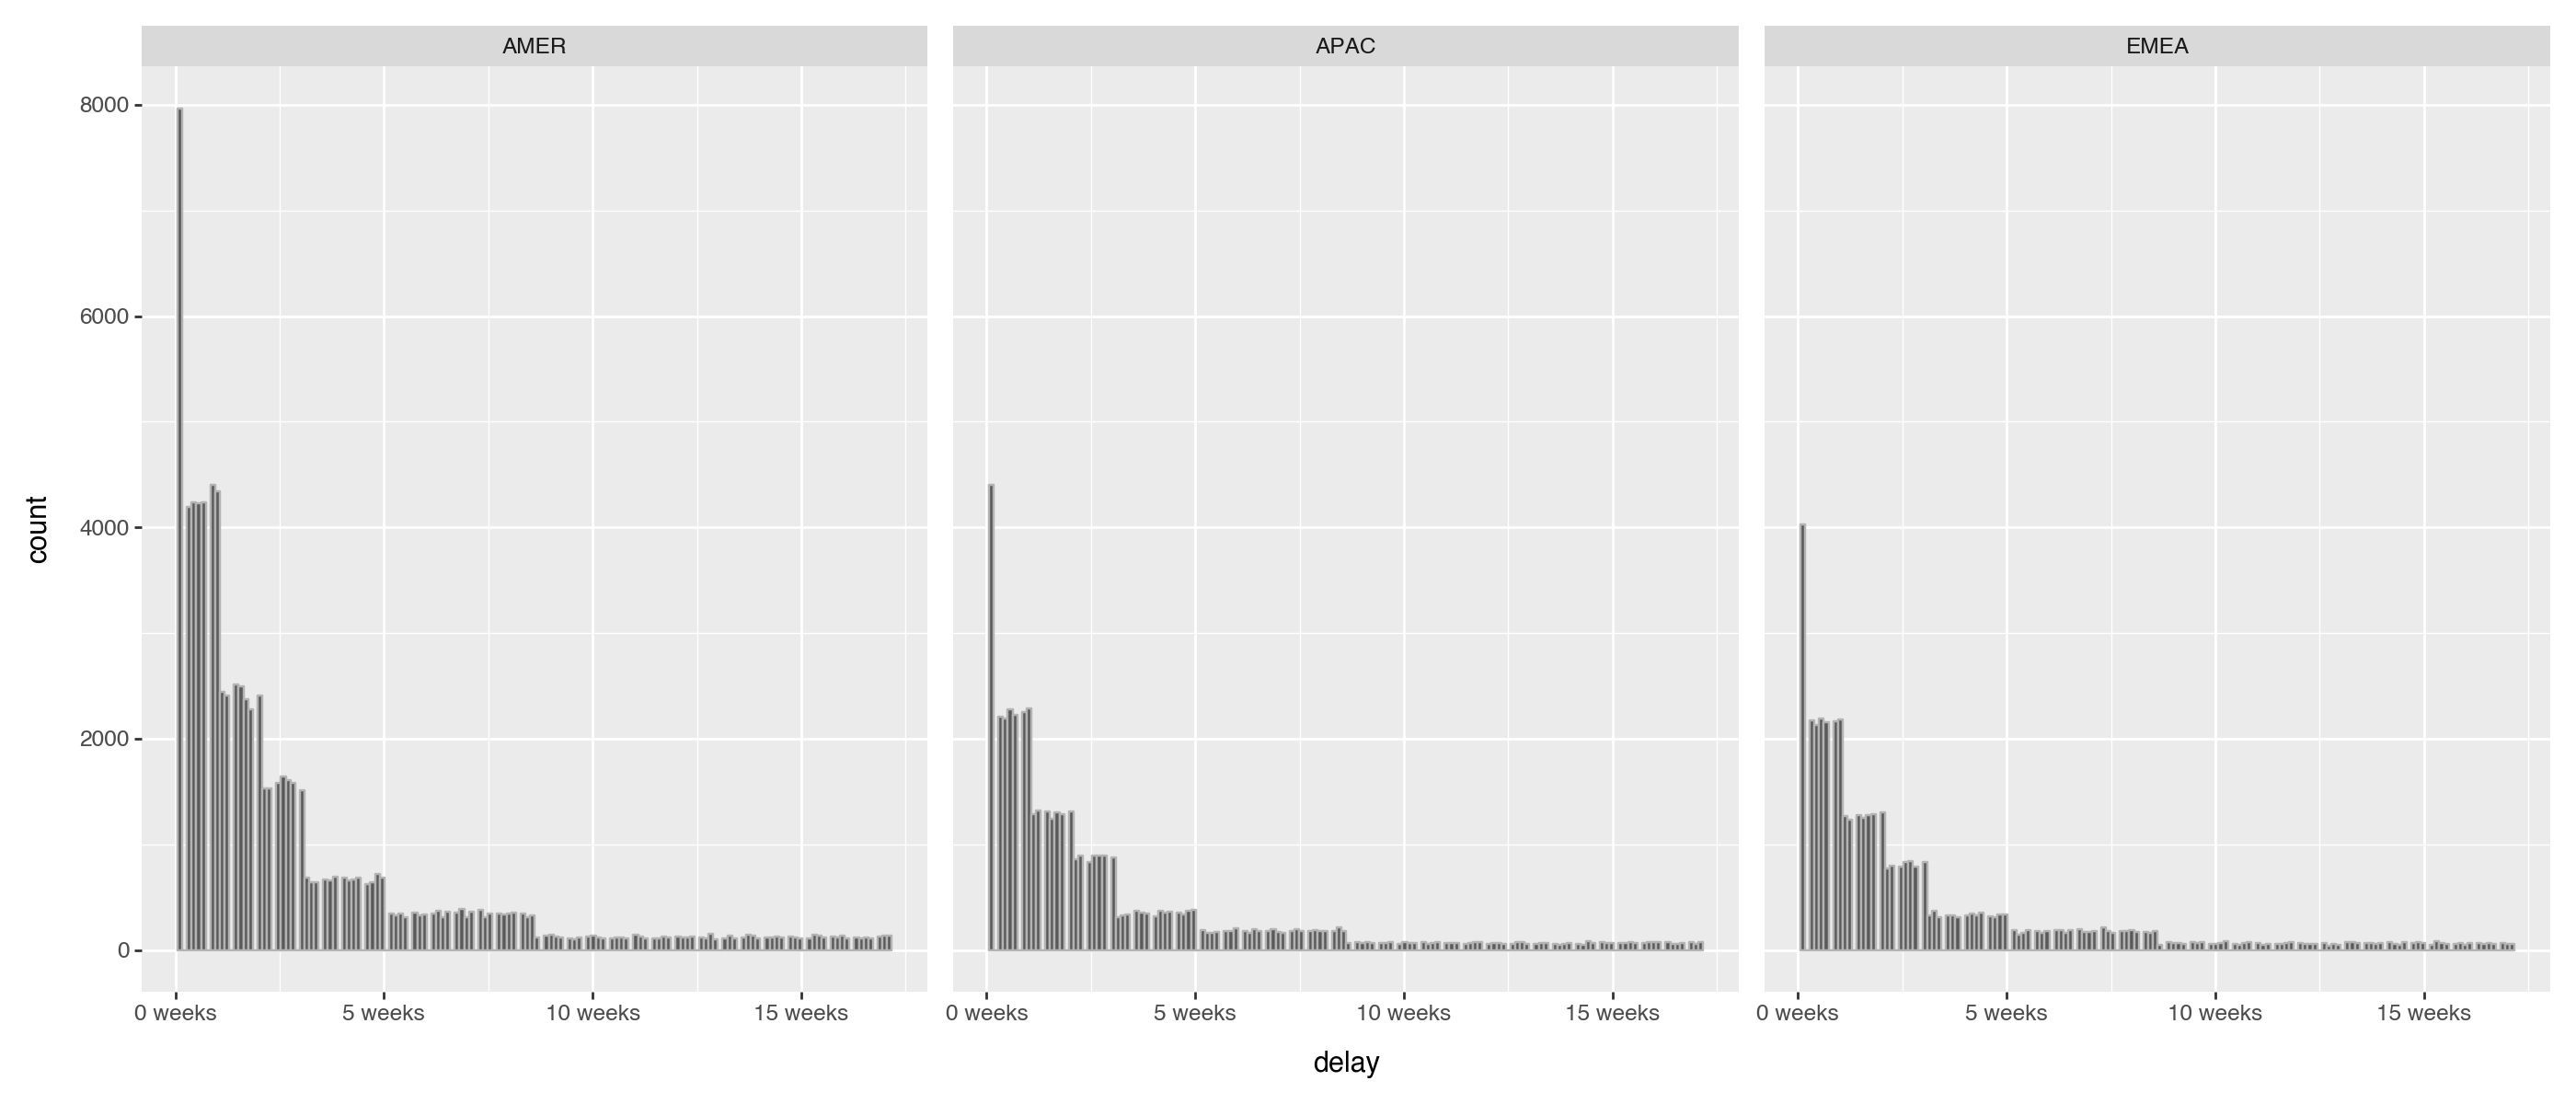

In [11]:
# PART A_1
p = ggplot(data = tr_cleaned, mapping = aes("delay"))
p + geom_histogram(color="#b3b3b3") + facet_wrap("region") + theme(figure_size=(14, 6))

/Users/andrescastillo/Library/Python/3.14/lib/python/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 152'. Pick better value with 'binwidth'.


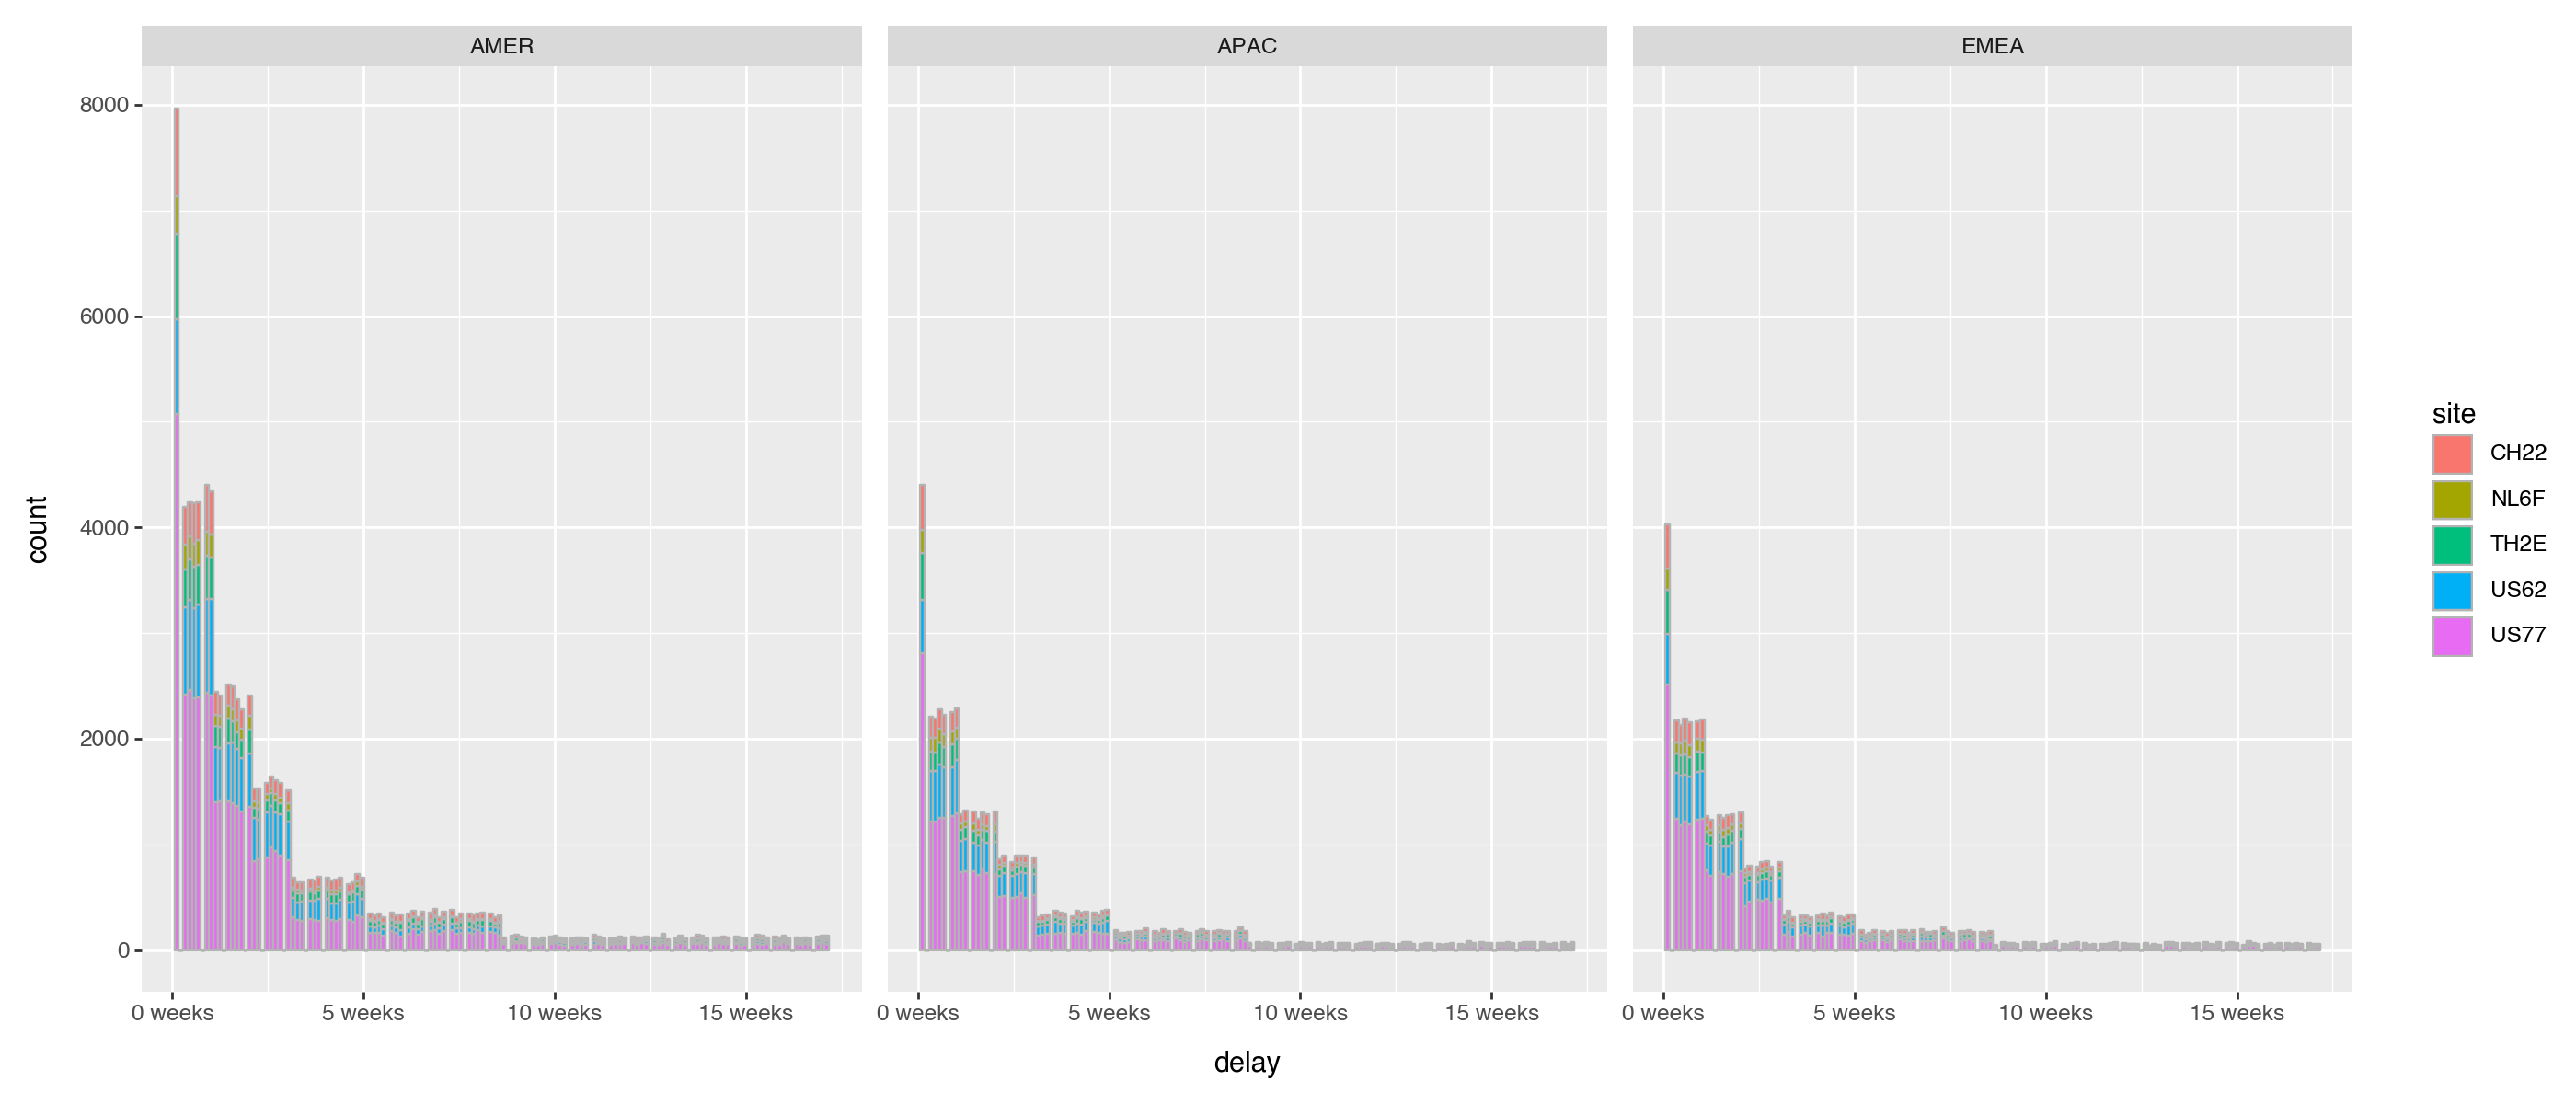

In [12]:
# PART A_2
p = ggplot(data = tr_cleaned, mapping = aes("delay", fill = "site"))
p + geom_histogram(color="#b3b3b3") + facet_wrap("region") + theme(figure_size=(14, 6))

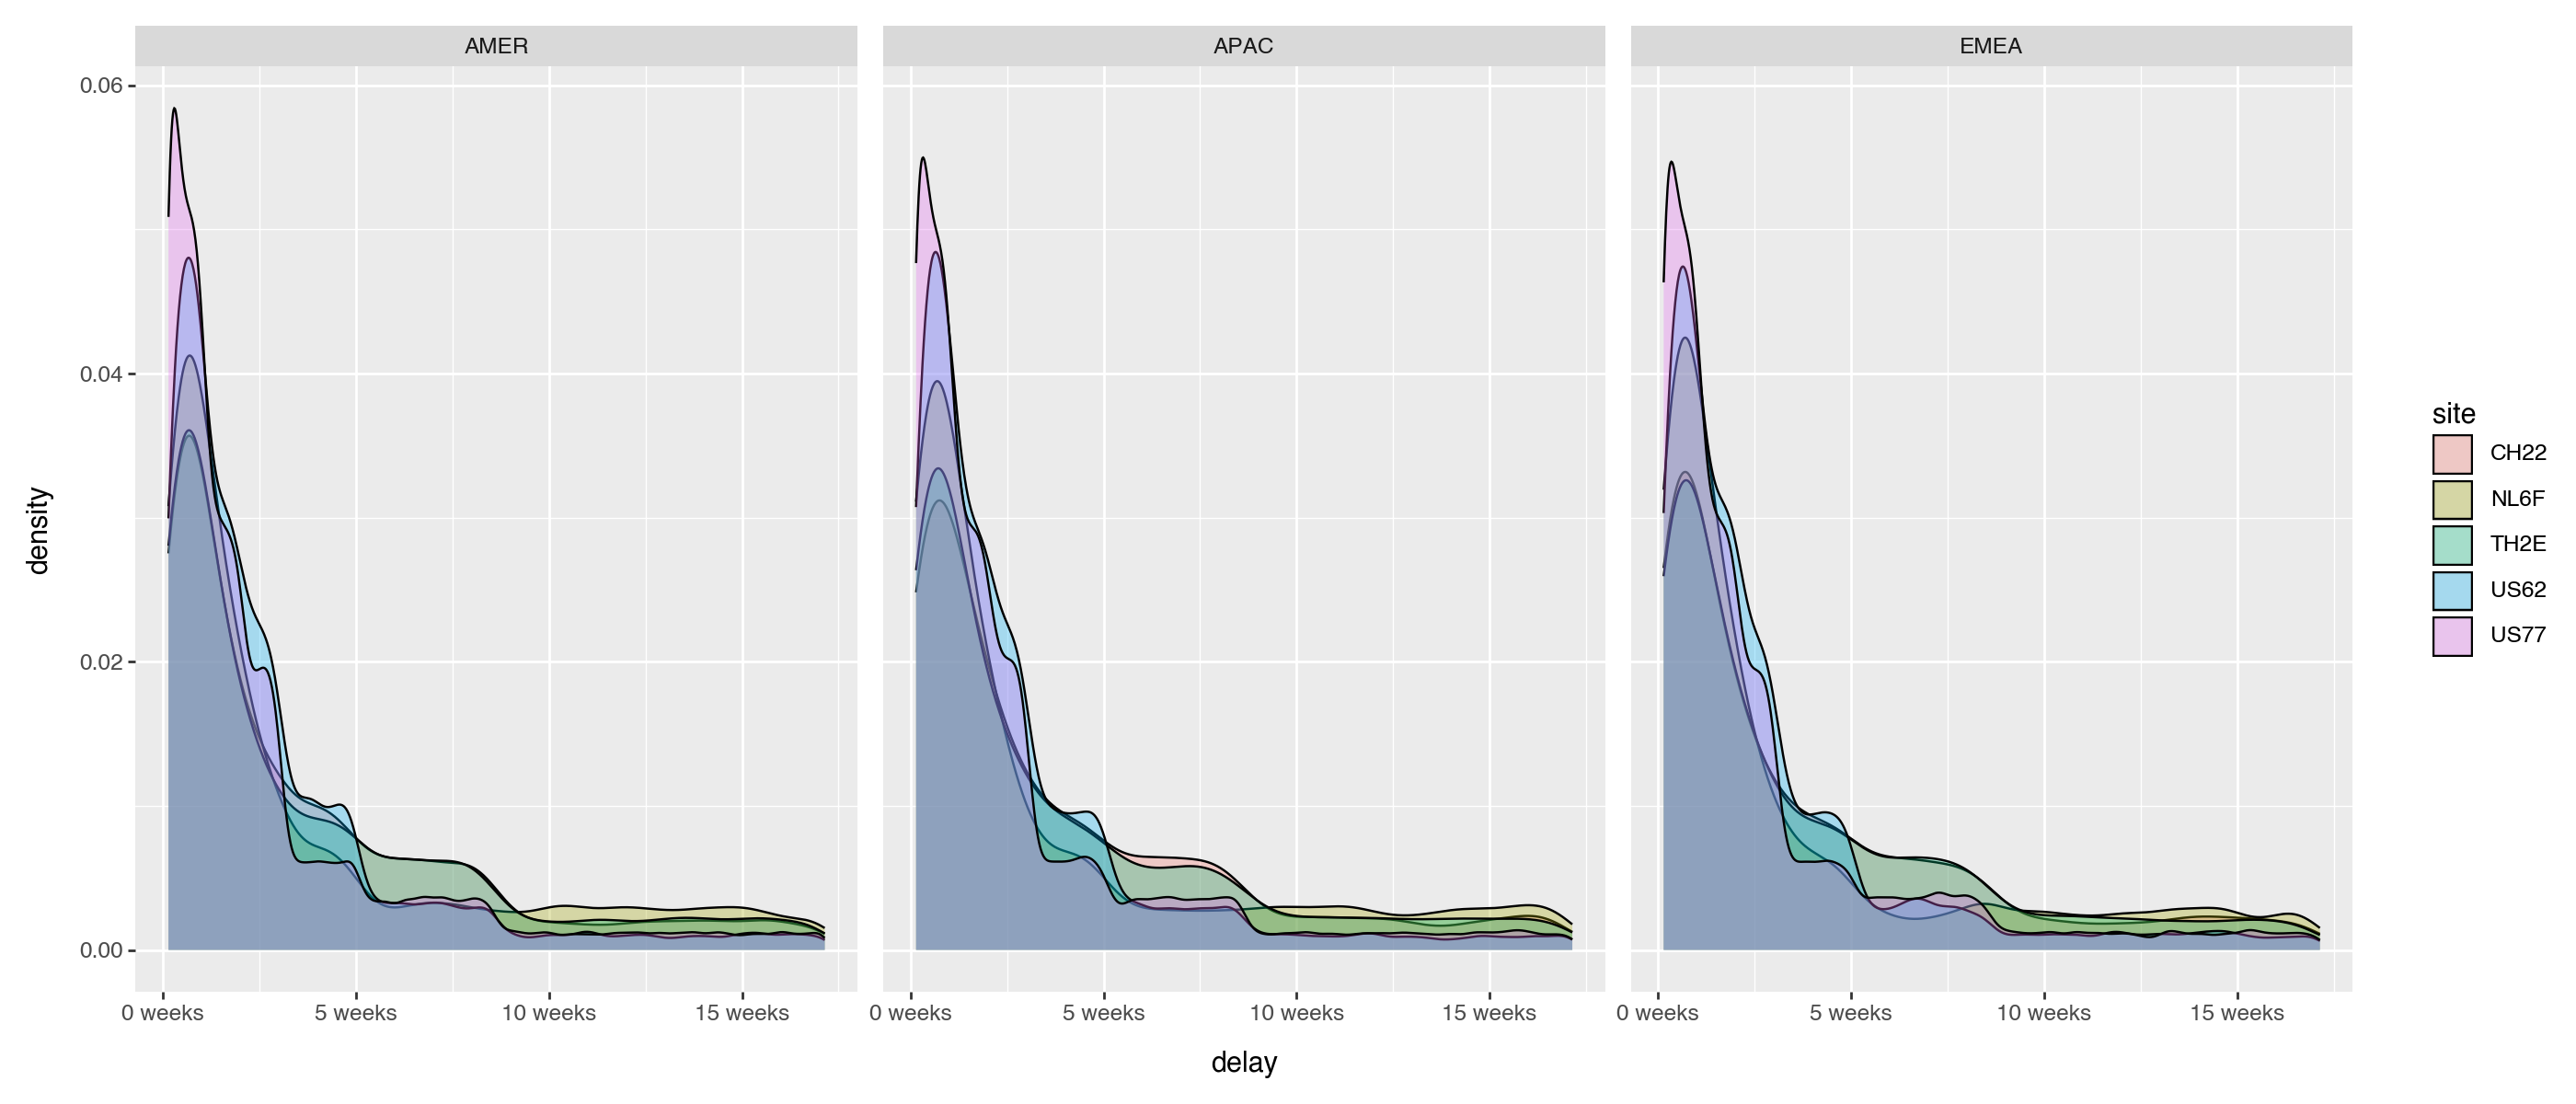

In [13]:
# PART A_3
p = ggplot(data = tr_cleaned, mapping = aes(x = "delay", fill ="site"))
p + geom_density(alpha = 0.3) + facet_wrap("region") + theme(figure_size=(14, 6))

## My response **`PART B`**
From looking at the graph, there seems to be a correlation between delay and invoice amount. The delay increases as the invoice amount increases but it does not occurr as much past invoice amount of $100,000.

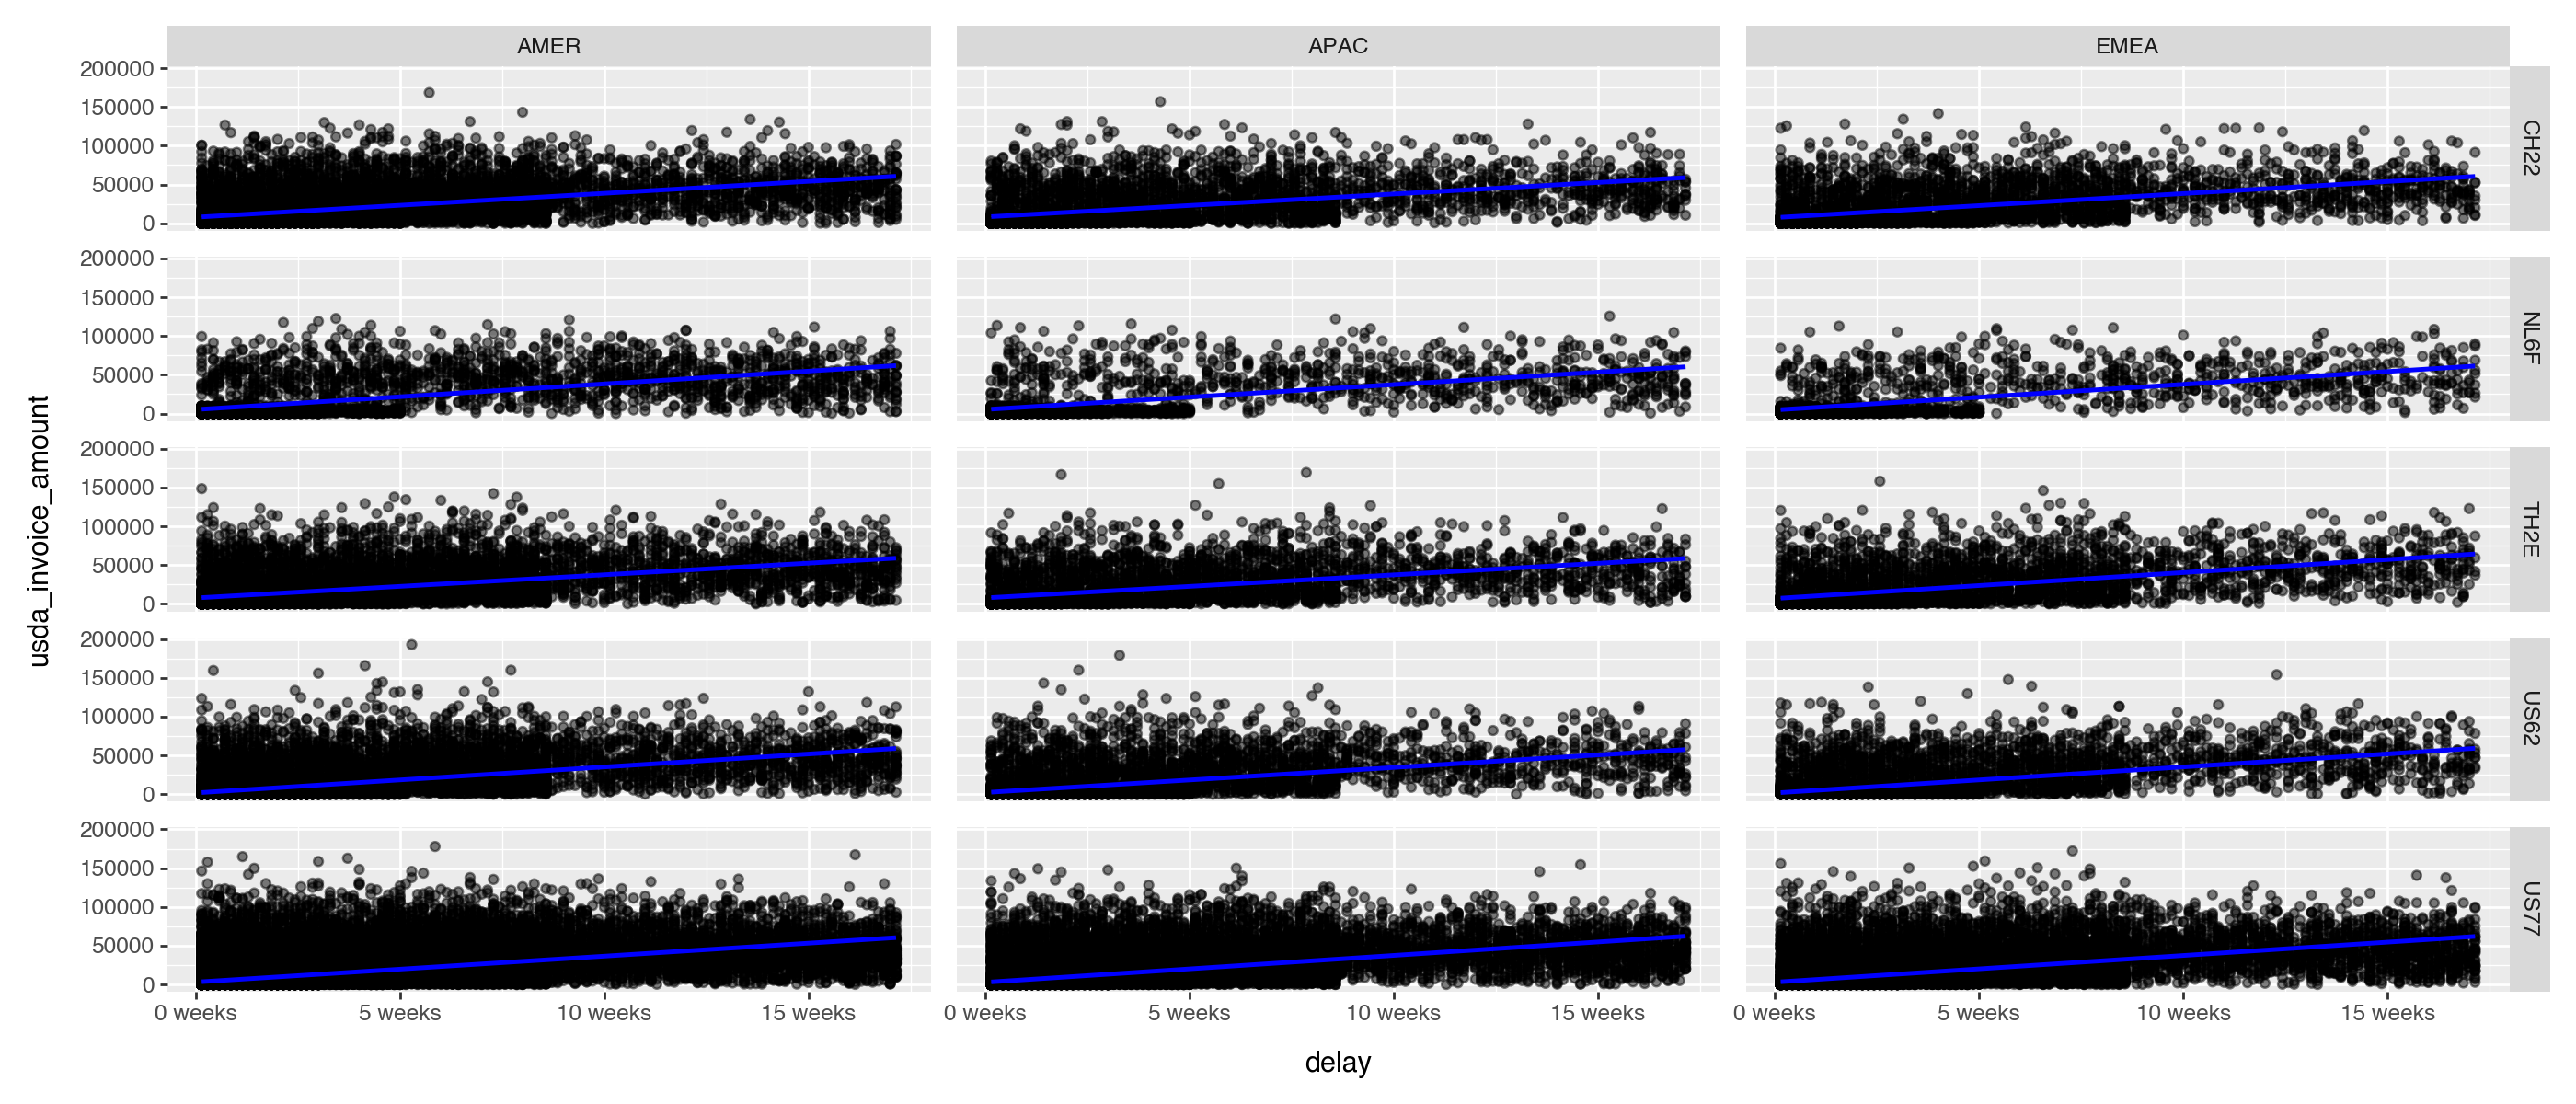

In [14]:
# PART B
p = ggplot(data = tr_cleaned, mapping = aes(x = "delay", y = "usda_invoice_amount"))
p + geom_point(alpha = 0.5) + facet_grid("site", "region") + geom_smooth(color = "blue") + theme(figure_size = (14, 6))

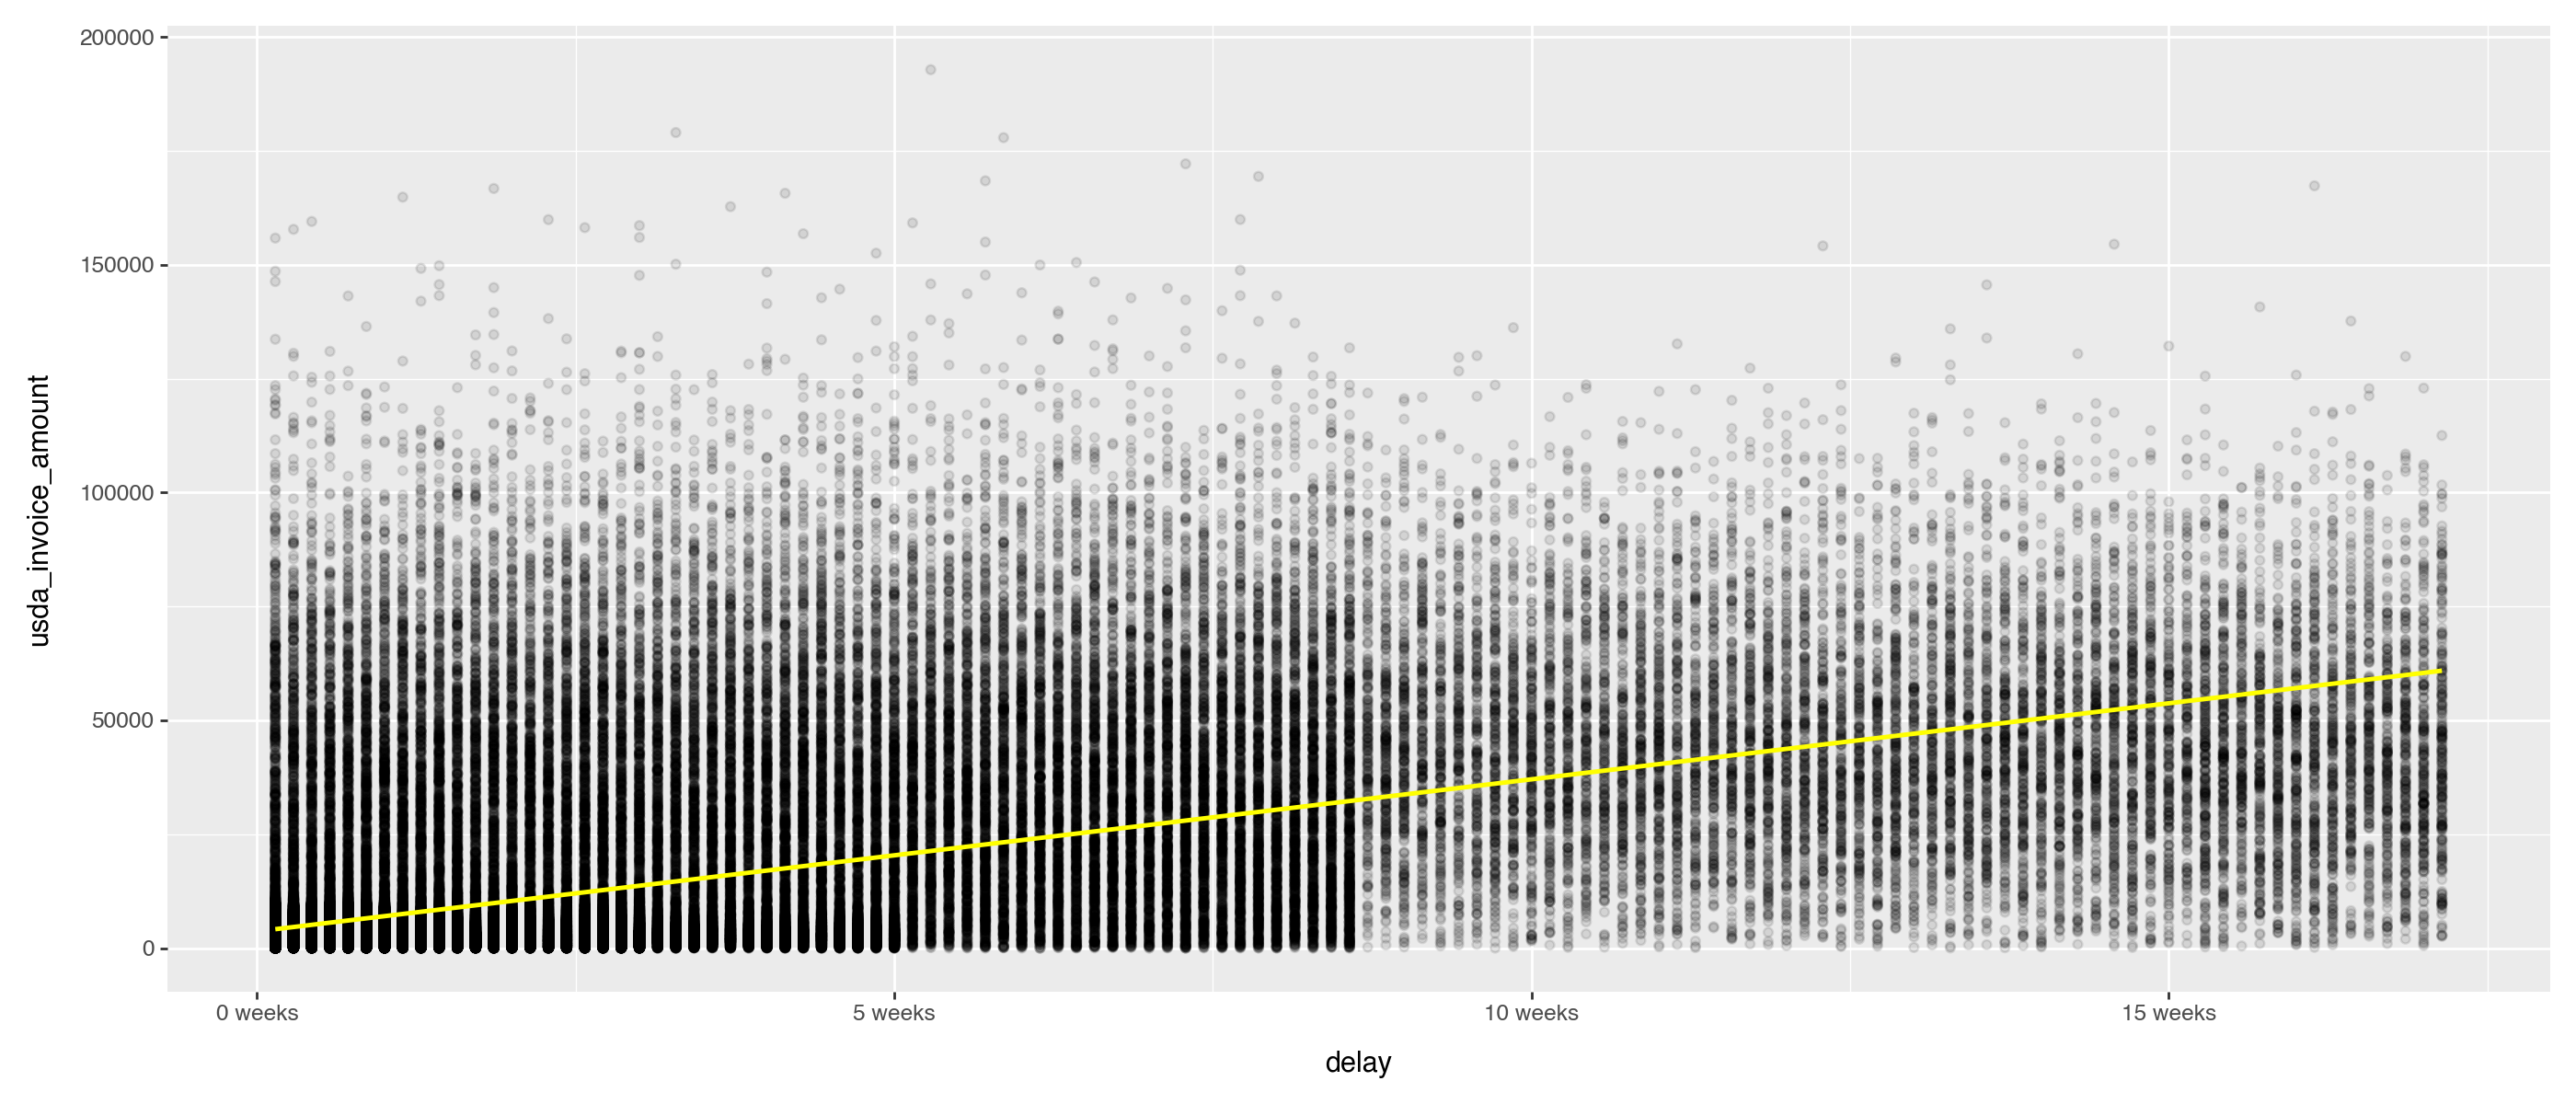

In [15]:
p = ggplot(data = tr_cleaned, mapping = aes(x = "delay", y = "usda_invoice_amount"))
p + geom_point(alpha = 0.1) + geom_smooth(color = "yellow") + theme(figure_size = (14, 6))

# **`Question 5`** **Delay by Mode**
Given your findings thus far, it is worthwhile to explore the delay variable across different transportation modes?

**PART A** Write Python code to create a ggplot to preview the distribution of delay across different modes of transportation. 

**PART B** Provide a written explanation for this visualization and refine your visual as much as possible.

## **`My response`**
Exploring delay by transportation mode is dependent on what a business views as important, for this assignment, the answer is yes. **A_1** makes it clear that less_container_load has the greatest delay compared to six other modes with a delay less than five weeks. Full_container_load is under ten weeks but it is still greater than five. Maybe the delay should be expected according to transportation mode.

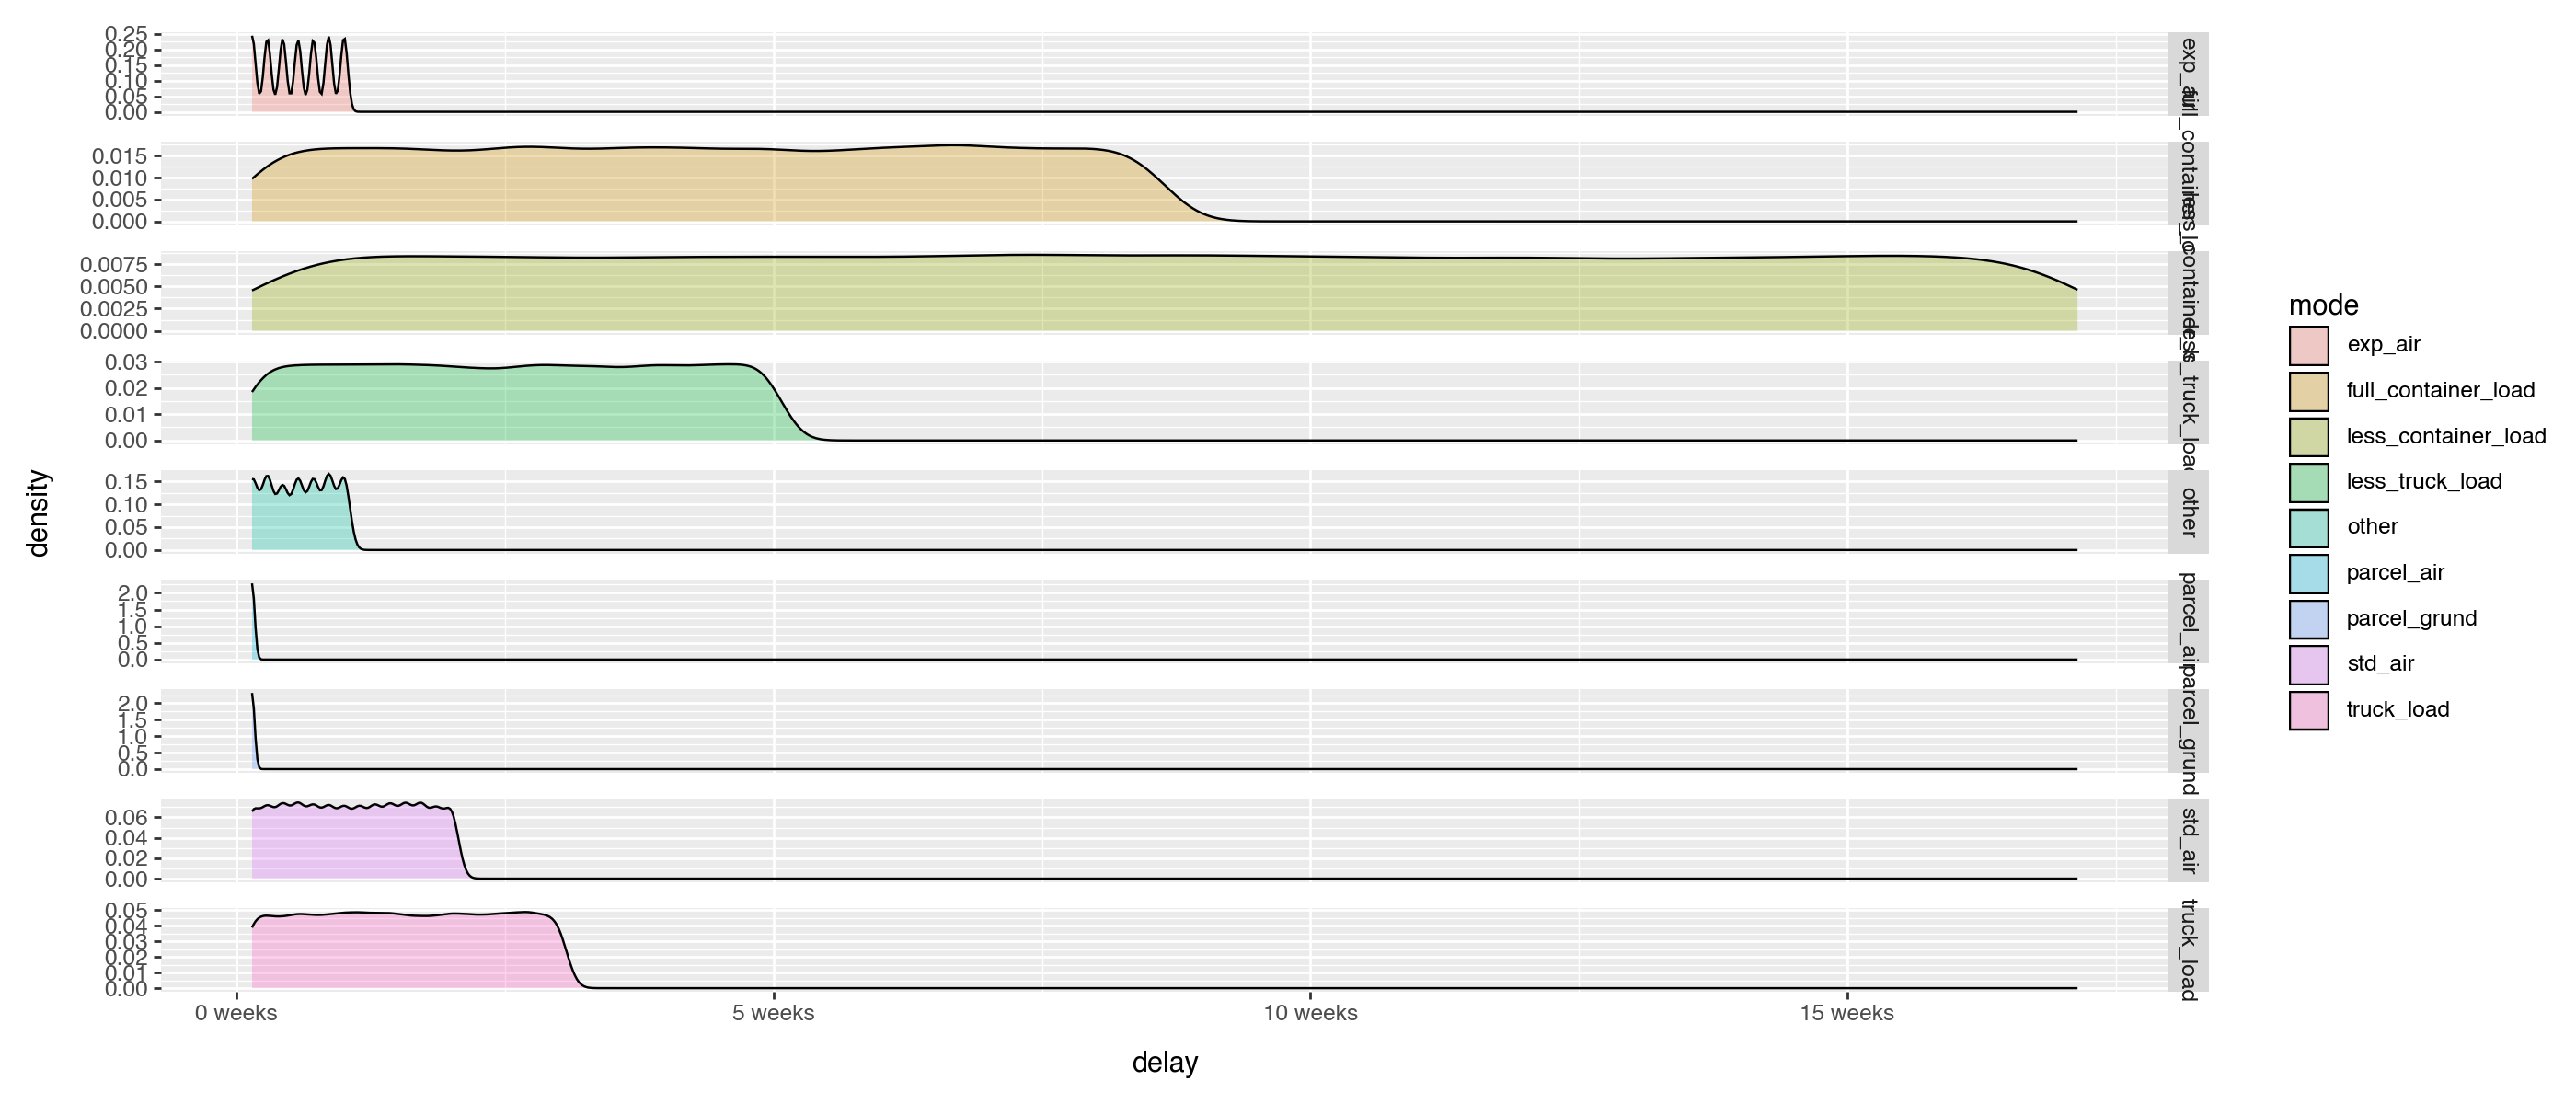

In [16]:
# PART A_1
p = ggplot(tr_cleaned, aes(x = "delay", fill = "mode")) + geom_density(alpha = .3) + facet_grid("mode", scales="free")
p + theme(figure_size=(14, 6))

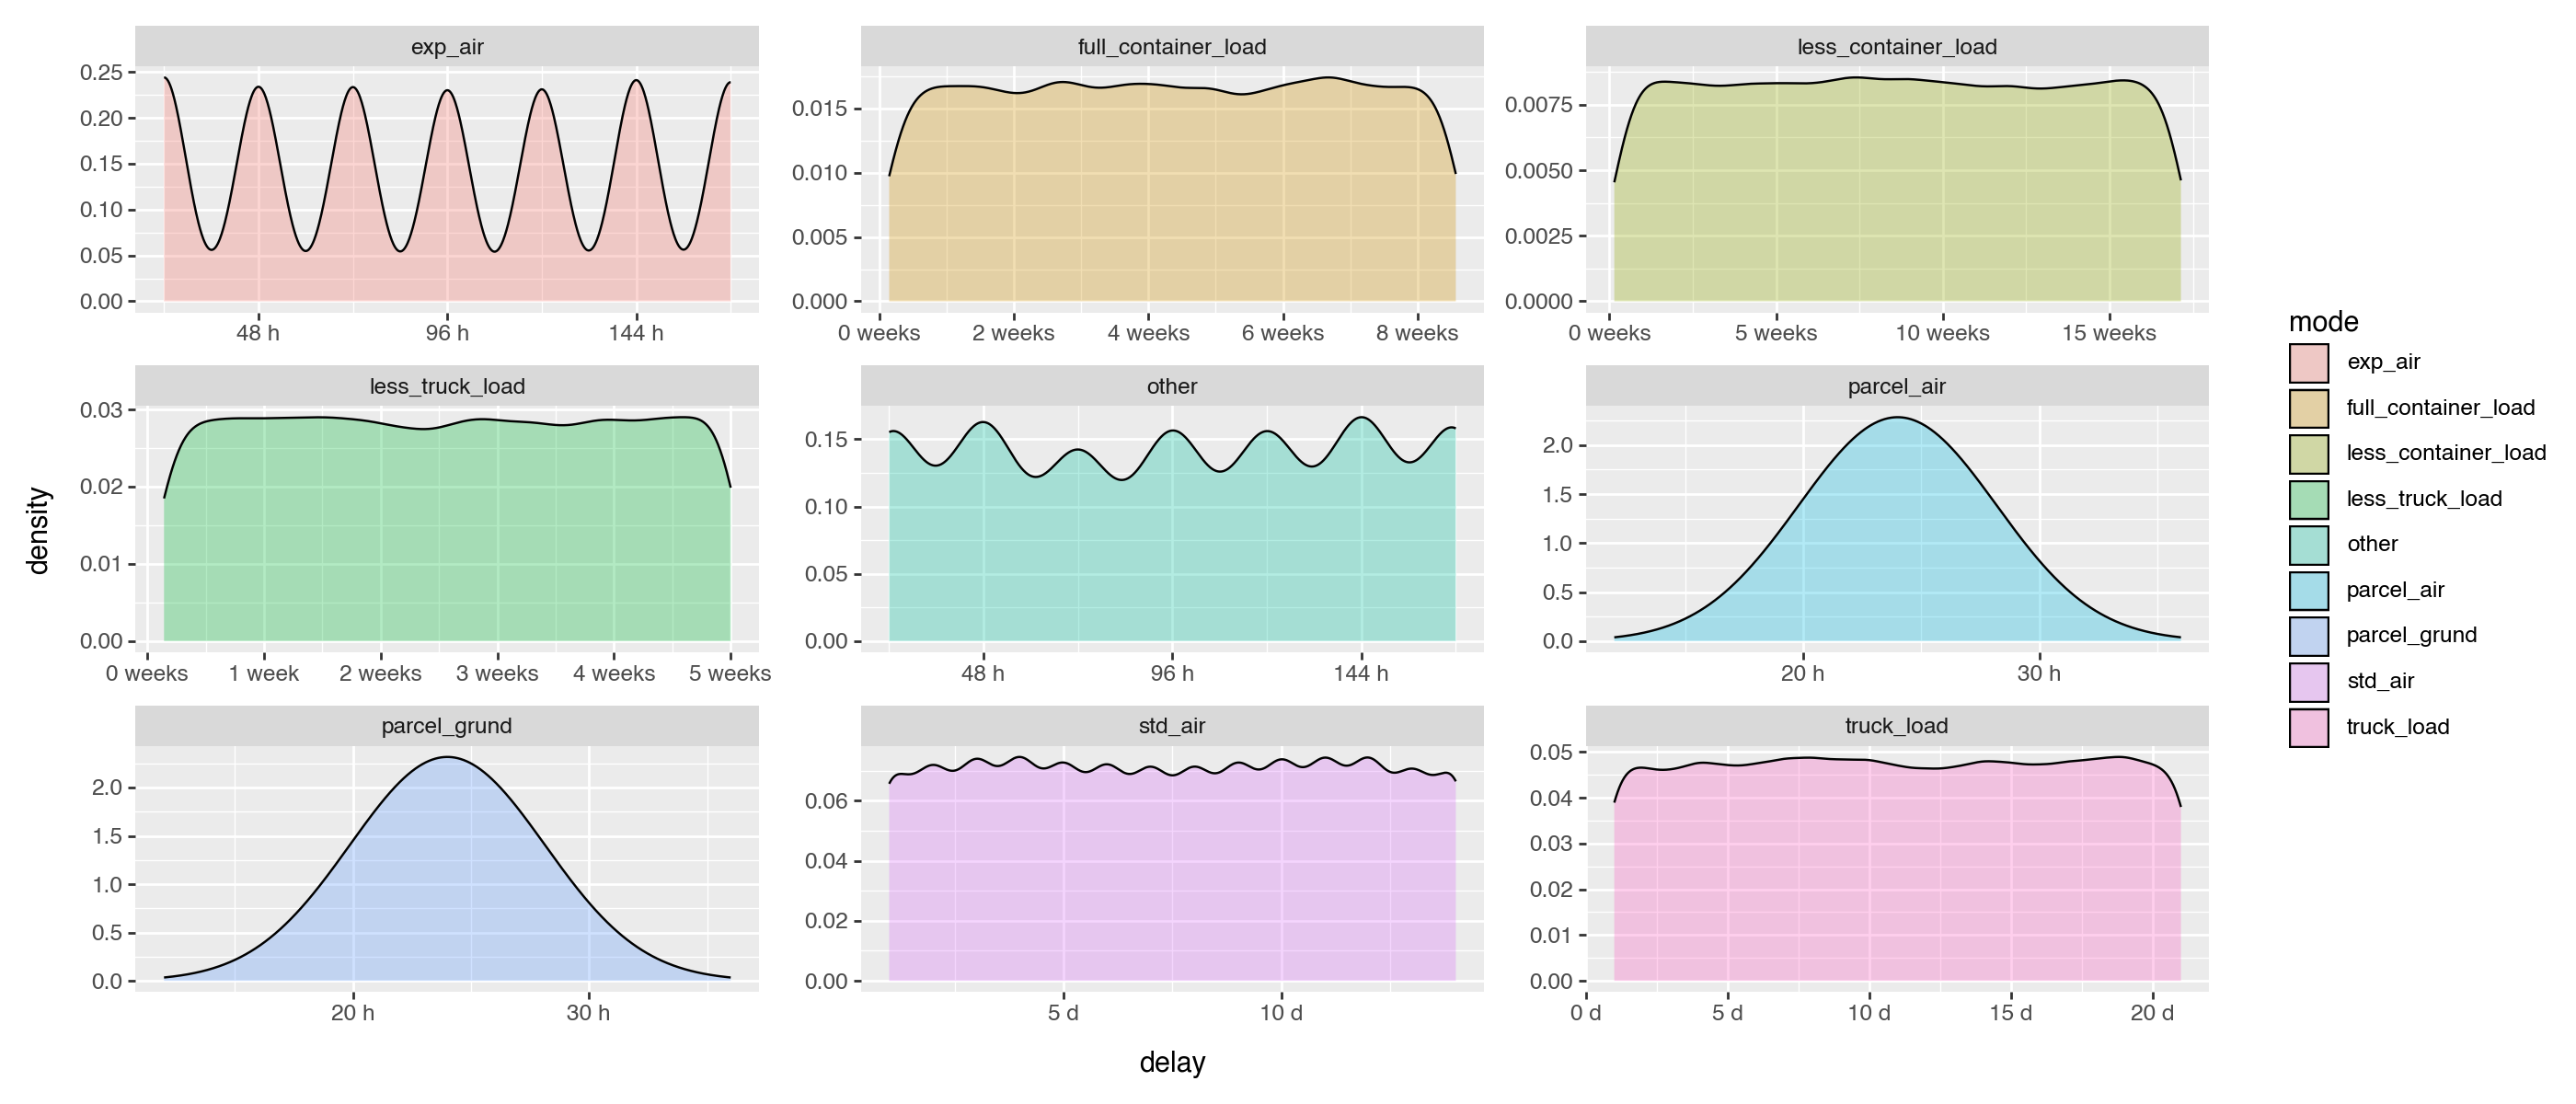

In [17]:
# PART A_2
p = ggplot(tr_cleaned, aes(x = "delay", fill = "mode")) + geom_density(alpha = .3) + facet_wrap("mode", scales="free")
p + theme(figure_size=(14, 6))

# **`Question 6`** **Delay Distribution by Mode**
After our analysis in Question 5 of the second assignment, we now know that the delays between invoice and shipment dates are closely related to the specific transportation mode. Create a compelling visual of this finding with the following requirements:

- A boxplot visualization of delay broken down by transportation mode (excluding NA values and the other categories), for which the boxplots are ordered based on delay (from largest delays to smallest delays)
- Including refinements such as proper x- and y-axis titles and labels. You should also use a custom theme to increase your plot's data-to-ink ratio.

Once you have created your visual, save a PNG file of it (with appropriate width, height, and dpi) to a plots folder in your assignment. You may label this image as "delay_dist_by_mode.png".

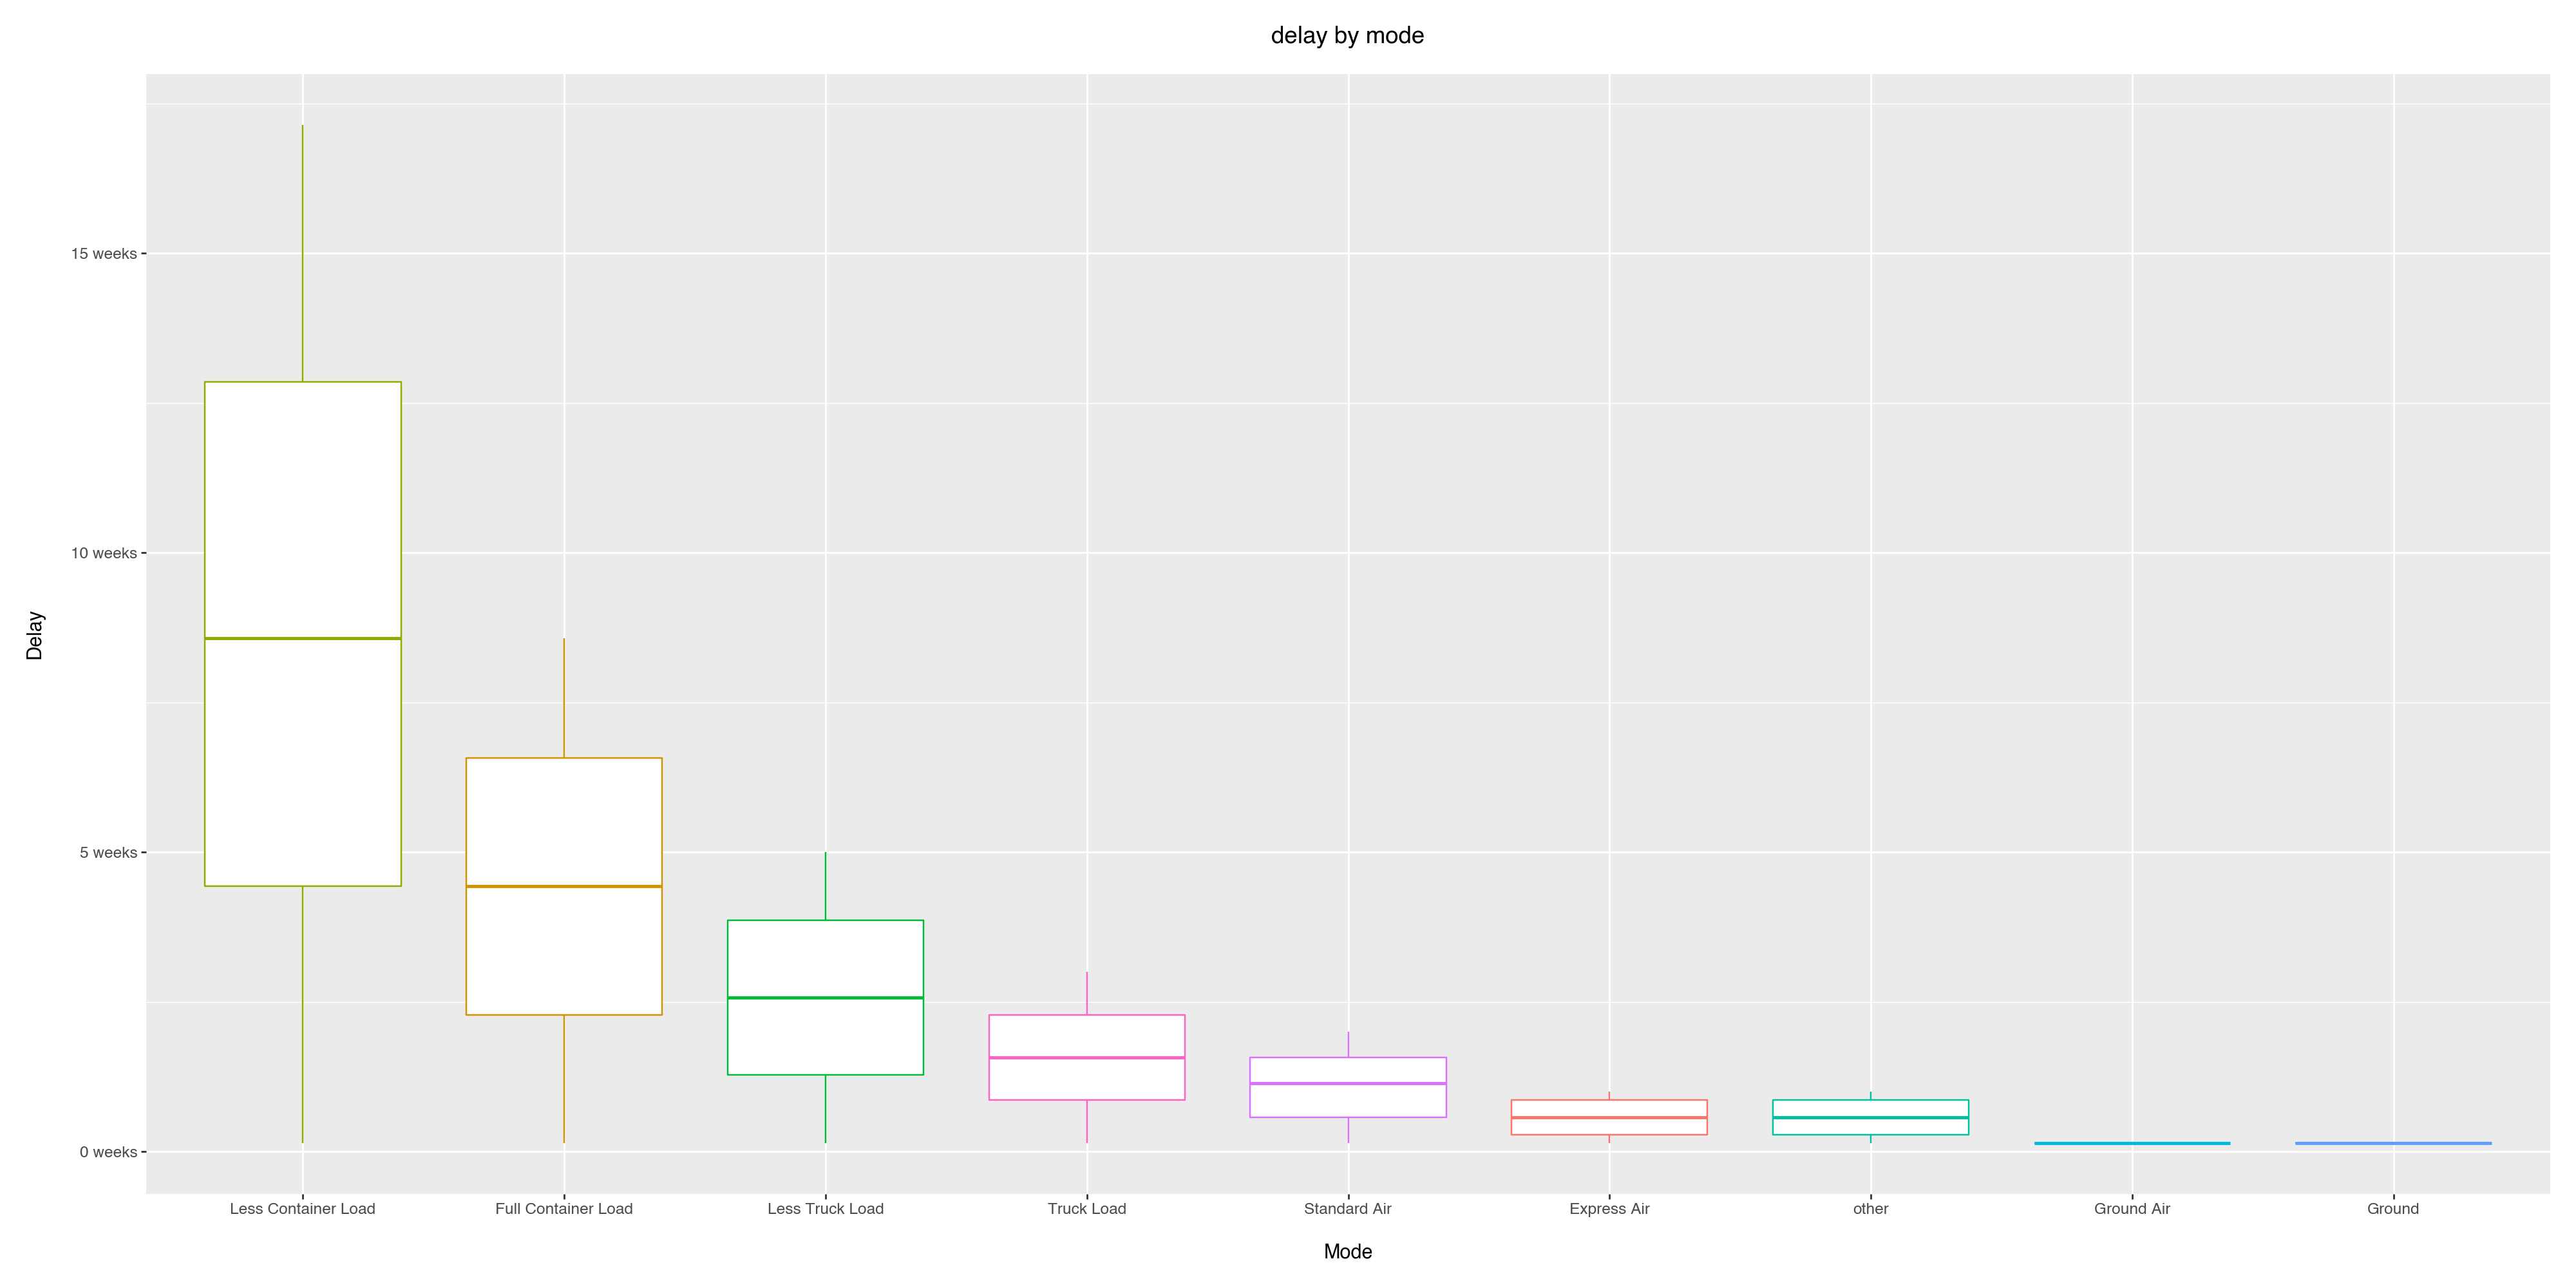

In [18]:
# vertical boxplots
new_names = {
    'less_truck_load': 'Less Truck Load',
    'full_container_load': 'Full Container Load',
    'std_air': 'Standard Air',
    'exp_air': 'Express Air',
    'less_container_load': 'Less Container Load',
    'truck_load': 'Truck Load',
    'parcel_grund': 'Ground',
    'parcel_air': 'Ground Air',
    'parcel': 'Parcel'}

question_6_order = (tr_cleaned.groupby("mode")["delay"].median().sort_values(ascending=False).index.tolist())

p = ggplot(data=tr_cleaned, mapping=aes(x="mode", y="delay", color="mode")) + \
    geom_boxplot() + \
    scale_x_discrete(limits=question_6_order, labels=new_names) + \
    labs(title="delay by mode", x="Mode", y="Delay") + \
    theme(axis_text_x=element_text(angle=0, hjust=0.5), legend_position="none")
p + theme(figure_size=(20, 10))

In [19]:
# vertical save
p.save(filename="../images/vertical_delay_dist_by_mode.png", width=12, height=7, dpi=300)

/Users/andrescastillo/Library/Python/3.14/lib/python/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 12 x 7 in image.
/Users/andrescastillo/Library/Python/3.14/lib/python/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: ../images/vertical_delay_dist_by_mode.png


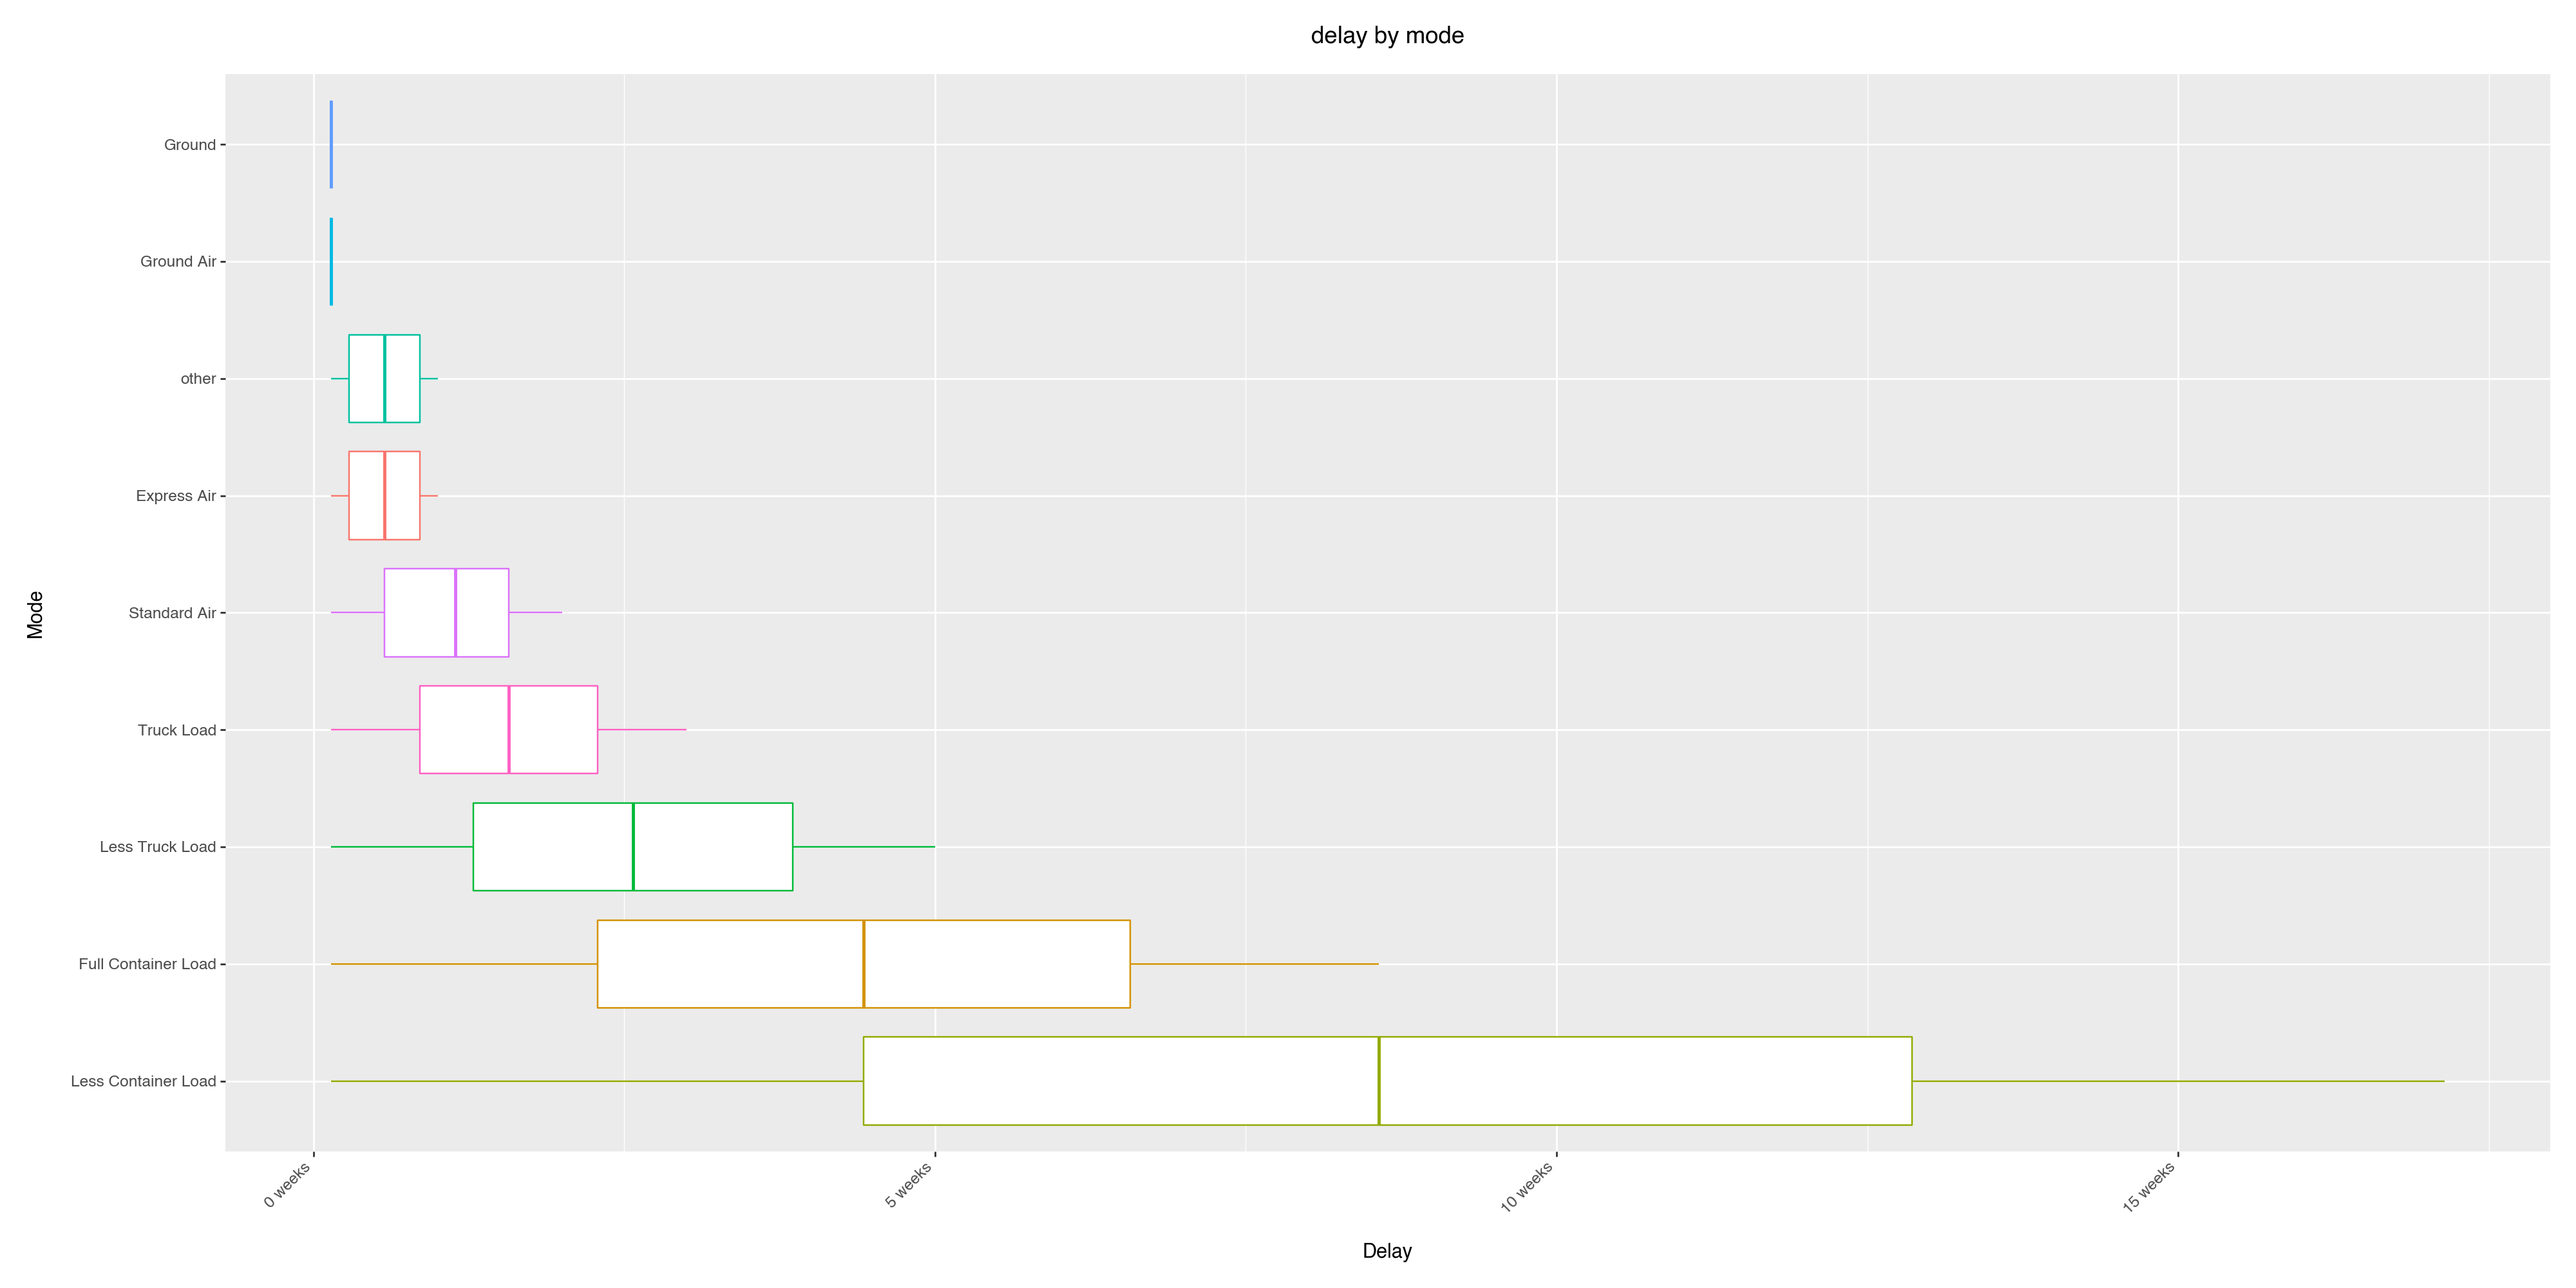

In [20]:
# horizontal boxplots with coord_flip()
p = ggplot(data=tr_cleaned, mapping=aes(x="mode", y="delay", color="mode")) + \
	geom_boxplot() + \
	scale_x_discrete(limits=question_6_order, labels=new_names) + \
	labs(title="delay by mode", x="Mode", y="Delay") + \
	theme(axis_text_x=element_text(angle=45, hjust=1), legend_position="none")+ \
    coord_flip()
p + theme(figure_size=(20, 10))

In [21]:
# horizontal save
p.save(filename="../images/horizontal_delay_dist_by_mode.png", width=12, height=7, dpi=300)

/Users/andrescastillo/Library/Python/3.14/lib/python/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 12 x 7 in image.
/Users/andrescastillo/Library/Python/3.14/lib/python/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: ../images/horizontal_delay_dist_by_mode.png


# **`Question 7`** **Invoice Time Series**

With the delay distribution analysis complete, we can finally focus on the invoice time series data and investigate any possible patterns (seasonality, trend, or both) that might help us with our estimation and forecasting tasks.

Create a visualization of the time series of invoice amounts by shipping date. Explain why this initial visualization is not suitable for our analysis.

Suggest and create another visualization that performs better than the initial visualization. Hint: You may need to create small multiples to get a better picture of invoice time series data.

Once your exploration is complete, decide on a final visualization, refine it with proper x- and y-axis titles and labels, and apply a custom theme to increase your plot's data-to-ink ratio. Afterward, save a PNG file of your final visual (with appropriate width, height, and dpi) to the plots folder in your assignment.

## **`My response`**
.

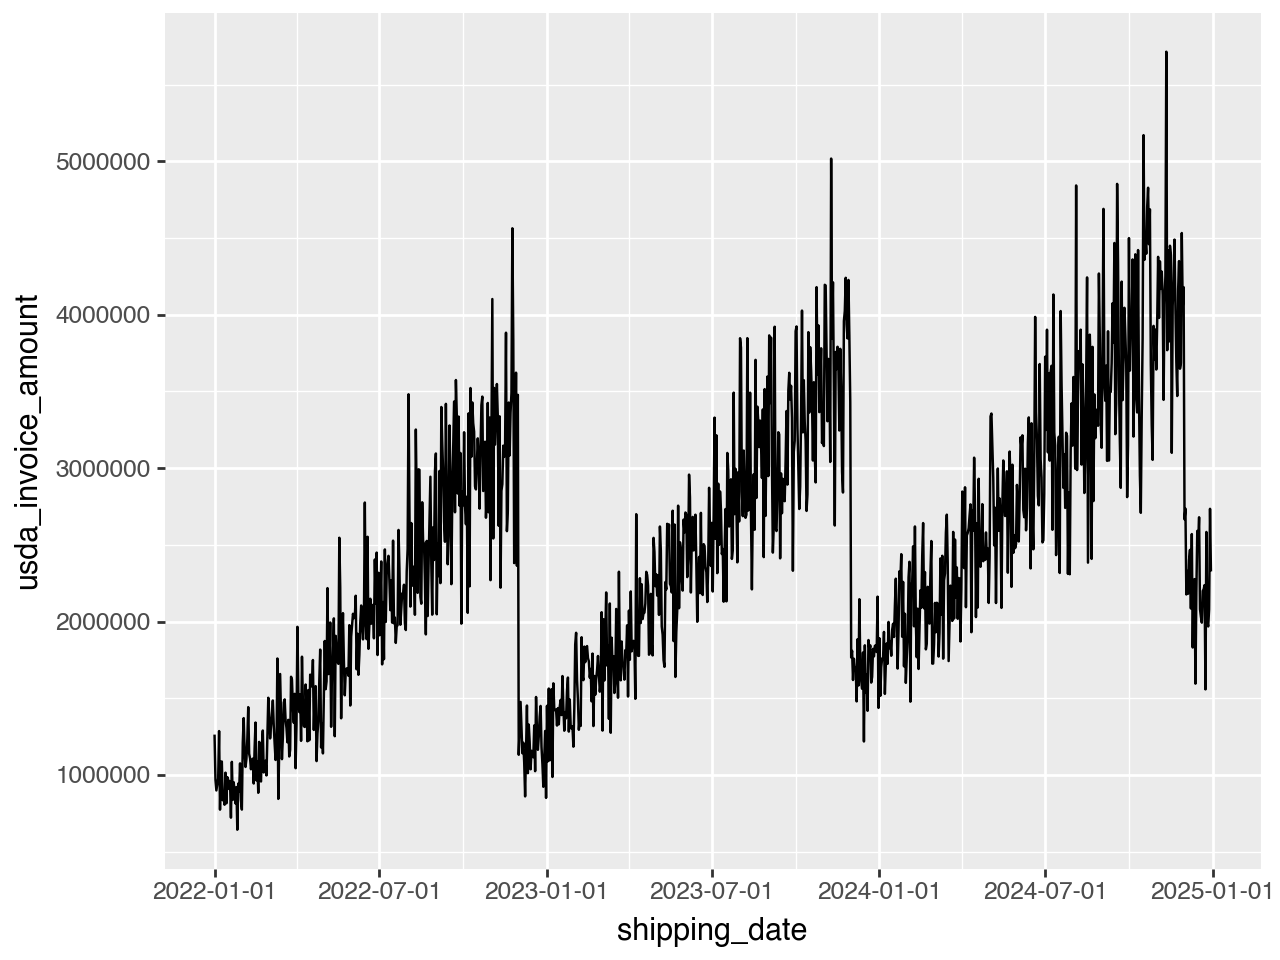

In [22]:
# STEP 1 | basic graph
p = ggplot(data=tr.groupby("shipping_date").aggregate({"usda_invoice_amount":"sum"}).reset_index(),
           mapping=aes(x="shipping_date", y = "usda_invoice_amount")) + geom_line()
p

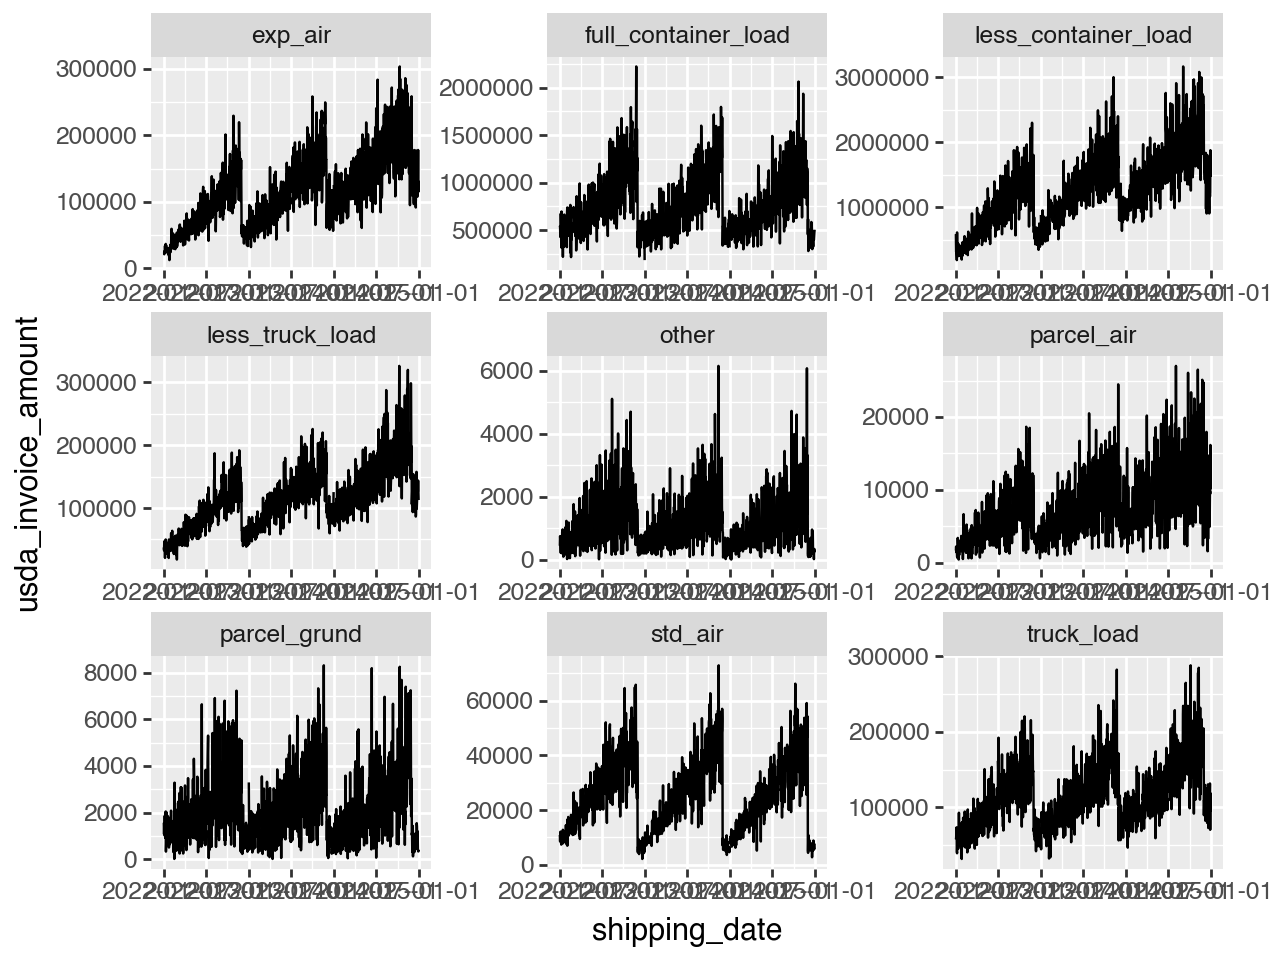

In [23]:
# STEP 2 | add grouping by year and facet by mode
tr["year"] = tr["shipping_date"].dt.year
p = ggplot(data=tr.groupby(["shipping_date", "mode", "year"]).aggregate({"usda_invoice_amount":"sum"}).reset_index(),
           mapping=aes(x="shipping_date", y = "usda_invoice_amount", group = "year")) + geom_line() + facet_wrap("mode", scales="free")
p

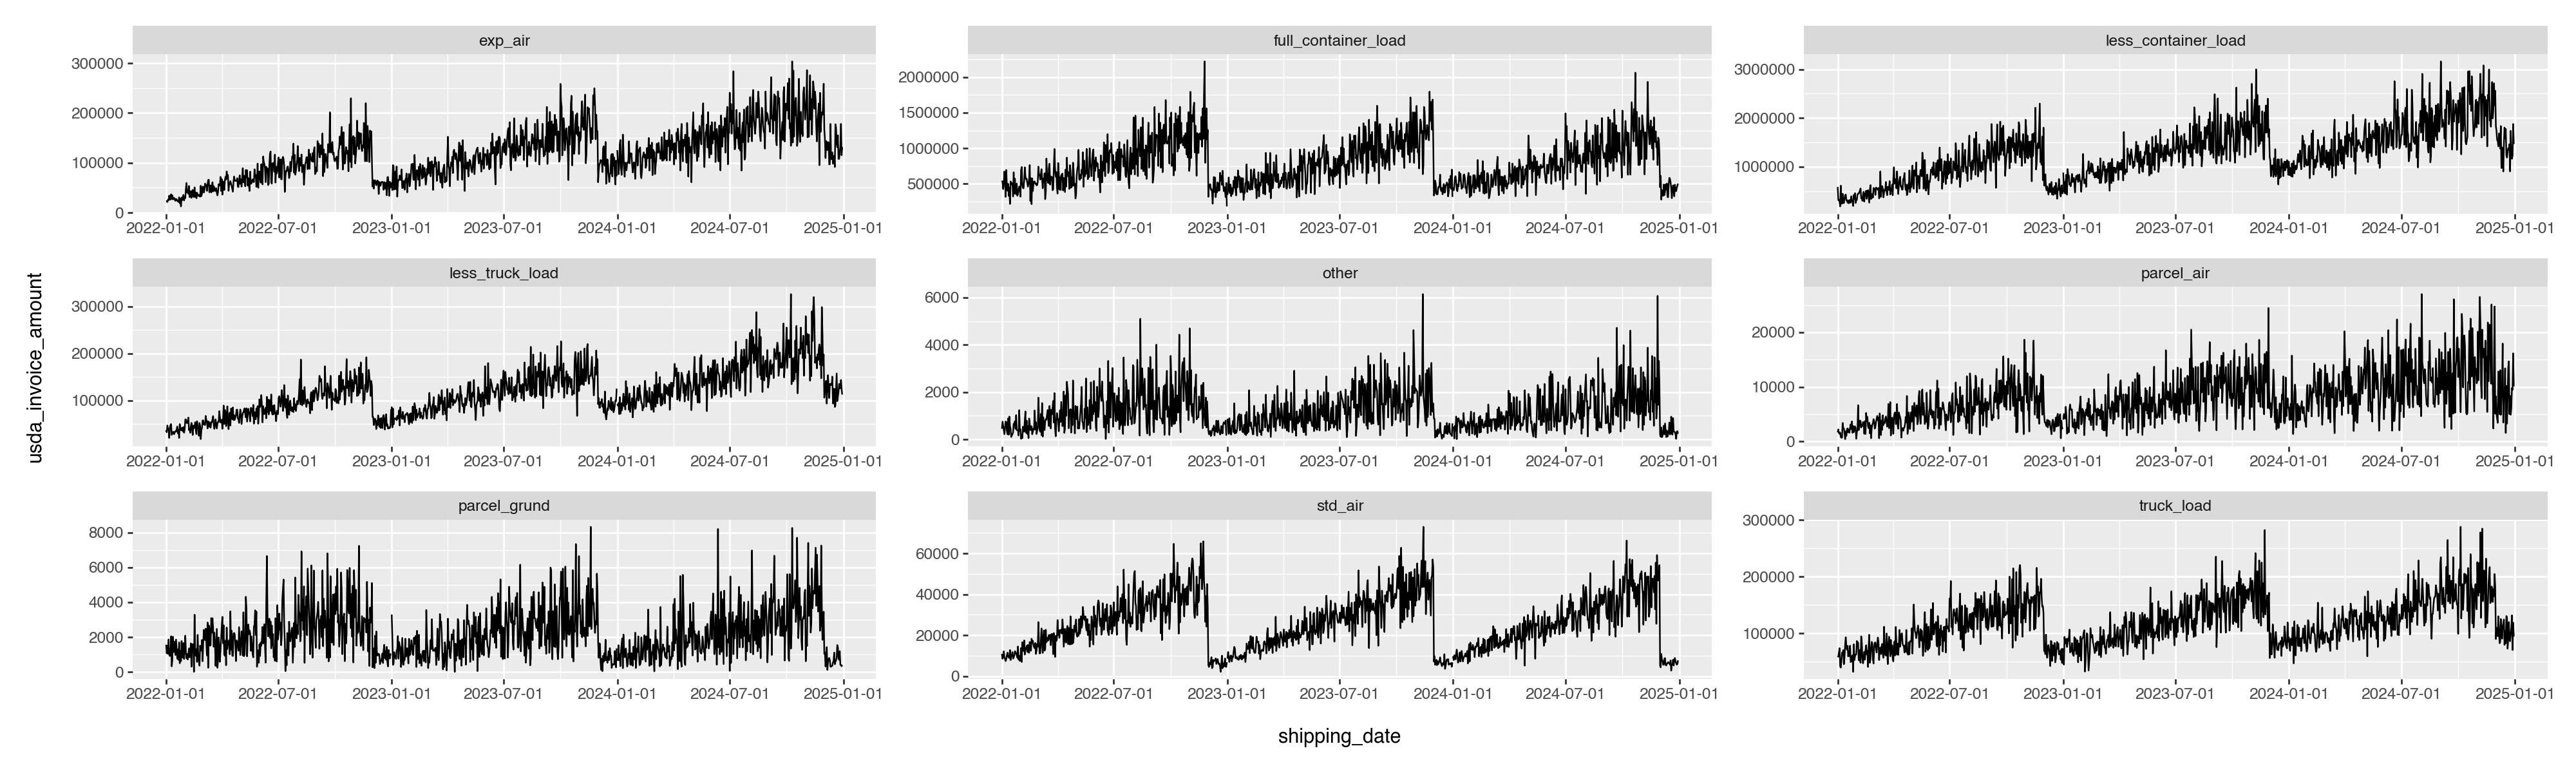

In [24]:
# STEP 3 | finalize with figure size
tr["year"] = tr["shipping_date"].dt.year
p = ggplot(
    data=tr.groupby(["shipping_date", "mode", "year"]).aggregate({"usda_invoice_amount":"sum"}).reset_index(),
    mapping=aes(x="shipping_date", y="usda_invoice_amount", group="year")
) + geom_line() + facet_wrap("mode", scales="free") + theme(figure_size=(20, 6))
p

# **`Question 8`** **Cost Estimation and Forecasting**
What can you conclude regarding the existing time-series patterns in the invoice amounts? How can these patterns help estimate or forecast transportation costs? Do these patterns differ by transportation mode? Please be sure to elaborate on your response.

## **`My Response`**
Some modes, like less than container load, has a monthly seasonality and trend, while parcel demonstrates monthly-seasonality.

# **REFERENCES**
***
As I have been exposed to Python for the semester, I have learned how to find answers. This final notebook is at the end of the semester, after I have practiced much more than when I first submitted my assignments. I do not have many references for this notebook, I am utilizing professor feedback and lecture notes to address the problems. My references are now for when I am having problems and what I have learned in class is not working. I find solutions.

**`Question 6`** https://www.google.com/search?client=safari&rls=en&q=ggsave+vs+p.save&ie=UTF-8&oe=UTF-8

I kept having an error saving, I googled my problem and that **p.save** _indicate it might refer to a user-defined function or, more likely, a common code pattern using base R graphics devices where a plot object p is saved using a function like png()_

        2 ggsave(filename="../images/vertical_delay_dist_by_mode.png", width=12, height=7, dpi=300)
        TypeError: ggplot.save() missing 1 required positional argument: 'self'